# Stock Market Data Analysis, Visualization and Best Predictive Models Development

## MJS Stock Market Data Analysis

## Project Goal
Develop a comprehensive analysis of at least four stocks, including:
* ● Data collection and cleaning
* ● Exploratory Data Analysis (EDA)
* ● Predictive modeling for price forecasting
* ● Interactive dashboard development

 ### Selected stocks
 1. Airbnb (ABNB)
 2. Booking Holdings (BKNG)
 3. Expedia (EXPE), and
 4. Marriott International (MAR)

In [1]:
!pip install yfinance

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.8 MB/s eta 0:00:00


In [3]:
!pip install prophet

In [4]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setu

In [5]:
# libraies imported
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Collection:

In [6]:
## fetching data Airbnb (ABNB)

# Medium Range: data for a 2years period with time-interval of 1 Hour.


# Define stock symbol and the timeframe
symbol = 'ABNB'
data_abnb_mr = yf.download(symbol, period="2y", interval="1h")

print(data_abnb_mr.head())

# Checkink the size
data_abnb_mr.shape


[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           ABNB        ABNB        ABNB        ABNB   
Datetime                                                                    
2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997  117.989998   
2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998  117.410004   
2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000  118.964996   
2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998  118.066200   
2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998  117.690002   

Price                      Volume  
Ticker                       ABNB  
Datetime                           
2023-02-06 14:30:00+00:00  705615  
2023-02-06 15:30:00+00:00  407280  
2023-02-06 16:30:00+00:00  296372  
2023-02-06 17:30:00+00:00  267915  
2023-02-06 18:30:00+00:00  309640  


(3494, 5)

<Axes: xlabel='Datetime'>

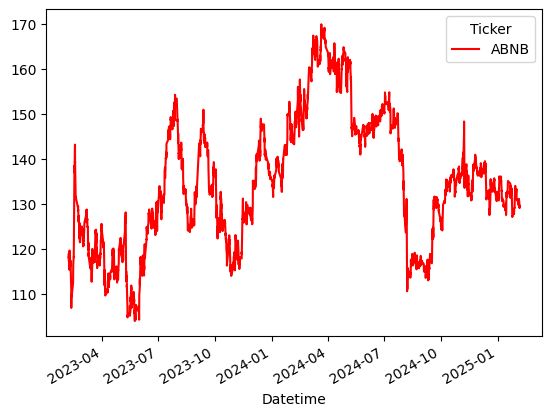

In [7]:
data_abnb_mr.plot.line(y="Close", use_index=True, color='red')


In [8]:
# converting into dataframe
ABNB_df_mr =pd.DataFrame(data_abnb_mr)

# creating a new column Stock
ABNB_df_mr['Stock'] = 'ABNB'

# Reset the index to move the date column into the dataFrame
ABNB_df_mr.reset_index(inplace=True)
print(ABNB_df_mr.head())

Price                   Datetime       Close        High         Low  \
Ticker                                  ABNB        ABNB        ABNB   
0      2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997   
1      2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998   
2      2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000   
3      2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998   
4      2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998   

Price         Open  Volume Stock  
Ticker        ABNB    ABNB        
0       117.989998  705615  ABNB  
1       117.410004  407280  ABNB  
2       118.964996  296372  ABNB  
3       118.066200  267915  ABNB  
4       117.690002  309640  ABNB  


In [9]:
# Renaming all columns
ABNB_df_mr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']
print(ABNB_df_mr.head())

                       Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997  117.989998   
1 2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998  117.410004   
2 2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000  118.964996   
3 2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998  118.066200   
4 2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998  117.690002   

   Volume Stock  
0  705615  ABNB  
1  407280  ABNB  
2  296372  ABNB  
3  267915  ABNB  
4  309640  ABNB  


In [10]:
data_abnb_mr['Datetime'] = data_abnb_mr.index.strftime('%Y-%m-%d %H:%M')
##data_abnb_mr_df=pd.read_csv(data_abnb_mr.to_csv(f"{symbol}_Medium_range.csv"))
print(data_abnb_mr.head())
data_abnb_mr.columns
data_abnb_mr.info()

Price                           Close        High         Low        Open  \
Ticker                           ABNB        ABNB        ABNB        ABNB   
Datetime                                                                    
2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997  117.989998   
2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998  117.410004   
2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000  118.964996   
2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998  118.066200   
2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998  117.690002   

Price                      Volume          Datetime  
Ticker                       ABNB                    
Datetime                                             
2023-02-06 14:30:00+00:00  705615  2023-02-06 14:30  
2023-02-06 15:30:00+00:00  407280  2023-02-06 15:30  
2023-02-06 16:30:00+00:00  296372  2023-02-06 16:30  
2023-02-06 17:30:00+00:00  267915  2023-02-06 17:30  
2023-

In [11]:
print(data_abnb_mr.index)

DatetimeIndex(['2023-02-06 14:30:00+00:00', '2023-02-06 15:30:00+00:00',
               '2023-02-06 16:30:00+00:00', '2023-02-06 17:30:00+00:00',
               '2023-02-06 18:30:00+00:00', '2023-02-06 19:30:00+00:00',
               '2023-02-06 20:30:00+00:00', '2023-02-07 14:30:00+00:00',
               '2023-02-07 15:30:00+00:00', '2023-02-07 16:30:00+00:00',
               ...
               '2025-02-04 18:30:00+00:00', '2025-02-04 19:30:00+00:00',
               '2025-02-04 20:30:00+00:00', '2025-02-05 14:30:00+00:00',
               '2025-02-05 15:30:00+00:00', '2025-02-05 16:30:00+00:00',
               '2025-02-05 17:30:00+00:00', '2025-02-05 18:30:00+00:00',
               '2025-02-05 19:30:00+00:00', '2025-02-05 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=3494, freq=None)


In [12]:
## fetching data Booking Holdings (BKNG)
symbol = 'BKNG'


# Medium Range: data for a 2 years period with time-interval of 1 hour.
data_bkng_mr = yf.download(symbol, period="2y", interval="1h")

print(data_bkng_mr.head())

# Checkink the size
data_bkng_mr.shape

[*********************100%***********************]  1 of 1 completed

Price                            Close         High          Low         Open  \
Ticker                            BKNG         BKNG         BKNG         BKNG   
Datetime                                                                        
2023-02-06 14:30:00+00:00  2451.449951  2462.314941  2425.909912  2429.810059   
2023-02-06 15:30:00+00:00  2457.010010  2457.010010  2440.500000  2445.520020   
2023-02-06 16:30:00+00:00  2463.209961  2464.945068  2451.320068  2458.800049   
2023-02-06 17:30:00+00:00  2465.679932  2471.820068  2459.790039  2466.665039   
2023-02-06 18:30:00+00:00  2468.459961  2474.554932  2460.070068  2465.574951   

Price                     Volume  
Ticker                      BKNG  
Datetime                          
2023-02-06 14:30:00+00:00  41086  
2023-02-06 15:30:00+00:00  19422  
2023-02-06 16:30:00+00:00  14008  
2023-02-06 17:30:00+00:00  19353  
2023-02-06 18:30:00+00:00  19616  


(3494, 5)

<Axes: xlabel='Datetime'>

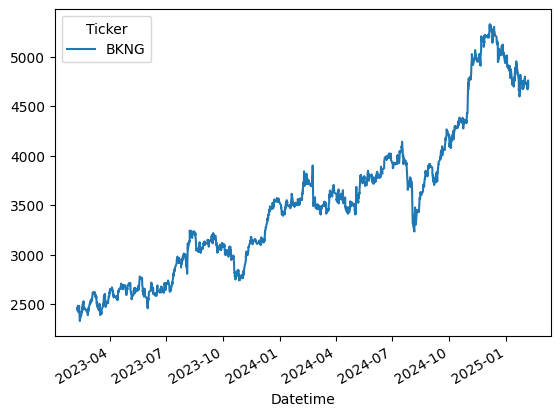

In [13]:
data_bkng_mr.plot.line(y="Close", use_index=True)

In [14]:
# converting into dataframe
BKNG_df_mr =pd.DataFrame(data_bkng_mr)

# creating a new column Stock
BKNG_df_mr['Stock'] = 'BKNG'

# Reset the index to move the date column into the dataFrame
BKNG_df_mr.reset_index(inplace=True)

# Renaming all columns
BKNG_df_mr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(BKNG_df_mr.head())

                       Date        Close         High          Low  \
0 2023-02-06 14:30:00+00:00  2451.449951  2462.314941  2425.909912   
1 2023-02-06 15:30:00+00:00  2457.010010  2457.010010  2440.500000   
2 2023-02-06 16:30:00+00:00  2463.209961  2464.945068  2451.320068   
3 2023-02-06 17:30:00+00:00  2465.679932  2471.820068  2459.790039   
4 2023-02-06 18:30:00+00:00  2468.459961  2474.554932  2460.070068   

          Open  Volume Stock  
0  2429.810059   41086  BKNG  
1  2445.520020   19422  BKNG  
2  2458.800049   14008  BKNG  
3  2466.665039   19353  BKNG  
4  2465.574951   19616  BKNG  


In [15]:
## fetching data Expedia (EXPE)
symbol = 'EXPE'

# Medium Range: data for 2years period with time-interval of 1hour.
data_expe_mr = yf.download(symbol, period="2y", interval="1h")
print(data_expe_mr.head())

# Checkink the size
data_expe_mr.shape

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           EXPE        EXPE        EXPE        EXPE   
Datetime                                                                    
2023-02-06 14:30:00+00:00  117.925003  120.089996  116.680000  117.459999   
2023-02-06 15:30:00+00:00  118.761299  118.889999  117.184998  117.870003   
2023-02-06 16:30:00+00:00  118.754997  119.199997  118.434998  118.800003   
2023-02-06 17:30:00+00:00  118.605003  119.190002  117.919998  118.790001   
2023-02-06 18:30:00+00:00  119.474998  119.730003  118.559998  118.570000   

Price                      Volume  
Ticker                       EXPE  
Datetime                           
2023-02-06 14:30:00+00:00  476217  
2023-02-06 15:30:00+00:00  199568  
2023-02-06 16:30:00+00:00  170265  
2023-02-06 17:30:00+00:00  150430  
2023-02-06 18:30:00+00:00  232072  


(3494, 5)

<Axes: xlabel='Datetime'>

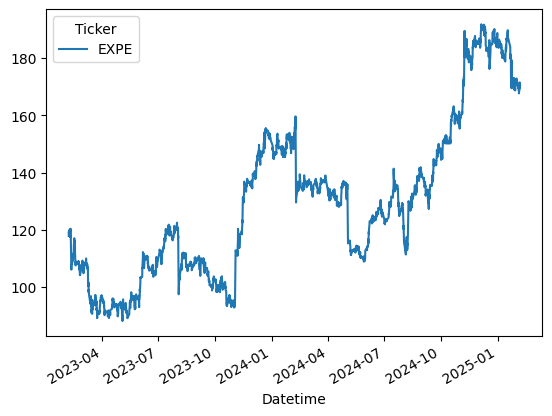

In [16]:
data_expe_mr.plot.line(y="Close", use_index=True)

In [17]:
# converting into dataframe
EXPE_df_mr =pd.DataFrame(data_expe_mr)

# creating a new column Stock
EXPE_df_mr['Stock'] = 'EXPE'

# Reset the index to move the date column into the dataFrame
EXPE_df_mr.reset_index(inplace=True)

# Renaming all columns
EXPE_df_mr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(EXPE_df_mr.head())

                       Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  117.925003  120.089996  116.680000  117.459999   
1 2023-02-06 15:30:00+00:00  118.761299  118.889999  117.184998  117.870003   
2 2023-02-06 16:30:00+00:00  118.754997  119.199997  118.434998  118.800003   
3 2023-02-06 17:30:00+00:00  118.605003  119.190002  117.919998  118.790001   
4 2023-02-06 18:30:00+00:00  119.474998  119.730003  118.559998  118.570000   

   Volume Stock  
0  476217  EXPE  
1  199568  EXPE  
2  170265  EXPE  
3  150430  EXPE  
4  232072  EXPE  


In [18]:
## fetching data Marriott International (MAR)
symbol = 'MAR'
# Medium Range: data for 2years period with time-interval of 1hour.
data_mar_mr = yf.download(symbol, period="2y", interval="1h")
print(data_mar_mr.head())


# Checking the size
data_mar_mr.shape

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                            MAR         MAR         MAR         MAR   
Datetime                                                                    
2023-02-06 14:30:00+00:00  172.990005  173.940002  172.714996  172.720001   
2023-02-06 15:30:00+00:00  173.375000  173.591995  172.419998  172.919998   
2023-02-06 16:30:00+00:00  172.660004  173.479996  172.619995  173.399994   
2023-02-06 17:30:00+00:00  172.470001  173.110001  172.229996  172.710007   
2023-02-06 18:30:00+00:00  172.449997  172.770004  172.289993  172.464996   

Price                      Volume  
Ticker                        MAR  
Datetime                           
2023-02-06 14:30:00+00:00  191143  
2023-02-06 15:30:00+00:00  155566  
2023-02-06 16:30:00+00:00  139261  
2023-02-06 17:30:00+00:00  140520  
2023-02-06 18:30:00+00:00  121077  


(3494, 5)

In [19]:
# converting into dataframe
MAR_df_mr =pd.DataFrame(data_mar_mr)

# creating a new column Stock
MAR_df_mr['Stock'] = 'MAR'

# Reset the index to move the date column into the dataFrame
MAR_df_mr.reset_index(inplace=True)

# Renaming all columns
MAR_df_mr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(MAR_df_mr.head())

                       Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  172.990005  173.940002  172.714996  172.720001   
1 2023-02-06 15:30:00+00:00  173.375000  173.591995  172.419998  172.919998   
2 2023-02-06 16:30:00+00:00  172.660004  173.479996  172.619995  173.399994   
3 2023-02-06 17:30:00+00:00  172.470001  173.110001  172.229996  172.710007   
4 2023-02-06 18:30:00+00:00  172.449997  172.770004  172.289993  172.464996   

   Volume Stock  
0  191143   MAR  
1  155566   MAR  
2  139261   MAR  
3  140520   MAR  
4  121077   MAR  


In [20]:
# compbining the four dataframes
combine_stock_df = pd.concat([ABNB_df_mr,BKNG_df_mr,EXPE_df_mr,MAR_df_mr], axis=0)

print(combine_stock_df)

                          Date       Close        High         Low  \
0    2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997   
1    2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998   
2    2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000   
3    2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998   
4    2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998   
...                        ...         ...         ...         ...   
3489 2025-02-05 16:30:00+00:00  291.299988  292.320007  291.290009   
3490 2025-02-05 17:30:00+00:00  291.554993  291.936005  291.179993   
3491 2025-02-05 18:30:00+00:00  292.799988  292.862488  291.440002   
3492 2025-02-05 19:30:00+00:00  292.670013  293.140015  292.220001   
3493 2025-02-05 20:30:00+00:00  292.368988  292.679993  291.605011   

            Open  Volume Stock  
0     117.989998  705615  ABNB  
1     117.410004  407280  ABNB  
2     118.964996  296372  ABNB  
3     118.066200  267915  A

In [21]:
# Description of Data in the Dataframe and rounding its values up to two decimal places

combine_stock_df.describe().round(2)


Close      High       Low      Open       Volume
count  13976.00  13976.00  13976.00  13976.00     13976.00
mean     998.22   1001.30    994.90    998.11    272876.20
std     1497.12   1501.45   1492.45   1496.97    414857.95
min       88.23     88.90     87.94     88.19         0.00
25%      132.10    132.63    131.50    132.06     61124.75
50%      172.46    173.24    171.80    172.46    170258.50
75%      803.96    808.67    803.12    804.15    344037.00
max     5330.00   5337.24   5313.52   5329.38  14838099.00

In [22]:
# converting the "Date" column dtype from object to date
combine_stock_df["Date"] = pd.to_datetime(combine_stock_df["Date"])

## Data Cleaning:
* ■ Handle missing values (e.g., forward fill, backward fill, interpolation).
* ■ Address outliers (e.g., Winsorization, removal).
* ■ Clean and preprocess data for further analysis

### Handle missing Values

In [23]:
# Checking the missing Value

print(combine_stock_df.isna().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Stock     0
dtype: int64


In [24]:
combine_stock_df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Stock     0
dtype: int64

In [25]:
## View Datatypes of all columns
combine_stock_df.info()
combine_stock_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 13976 entries, 0 to 3493
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    13976 non-null  datetime64[ns, UTC]
 1   Close   13976 non-null  float64            
 2   High    13976 non-null  float64            
 3   Low     13976 non-null  float64            
 4   Open    13976 non-null  float64            
 5   Volume  13976 non-null  int64              
 6   Stock   13976 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 873.5+ KB


Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997  117.989998   
1 2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998  117.410004   
2 2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000  118.964996   
3 2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998  118.066200   
4 2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998  117.690002   

   Volume Stock  
0  705615  ABNB  
1  407280  ABNB  
2  296372  ABNB  
3  267915  ABNB  
4  309640  ABNB

In [26]:
# Handle missing Values


## Address outliers

In [27]:
ABNB_df_mr.head()

Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  117.487602  119.209900  117.129997  117.989998   
1 2023-02-06 15:30:00+00:00  118.940002  119.189903  116.809998  117.410004   
2 2023-02-06 16:30:00+00:00  118.080002  119.333504  117.805000  118.964996   
3 2023-02-06 17:30:00+00:00  117.759300  118.690002  117.599998  118.066200   
4 2023-02-06 18:30:00+00:00  118.235001  118.669998  117.489998  117.690002   

   Volume Stock  
0  705615  ABNB  
1  407280  ABNB  
2  296372  ABNB  
3  267915  ABNB  
4  309640  ABNB

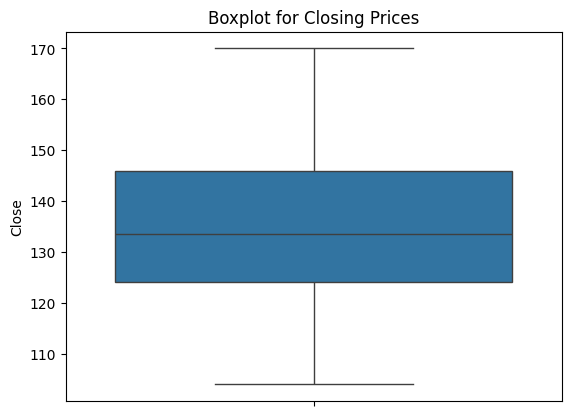

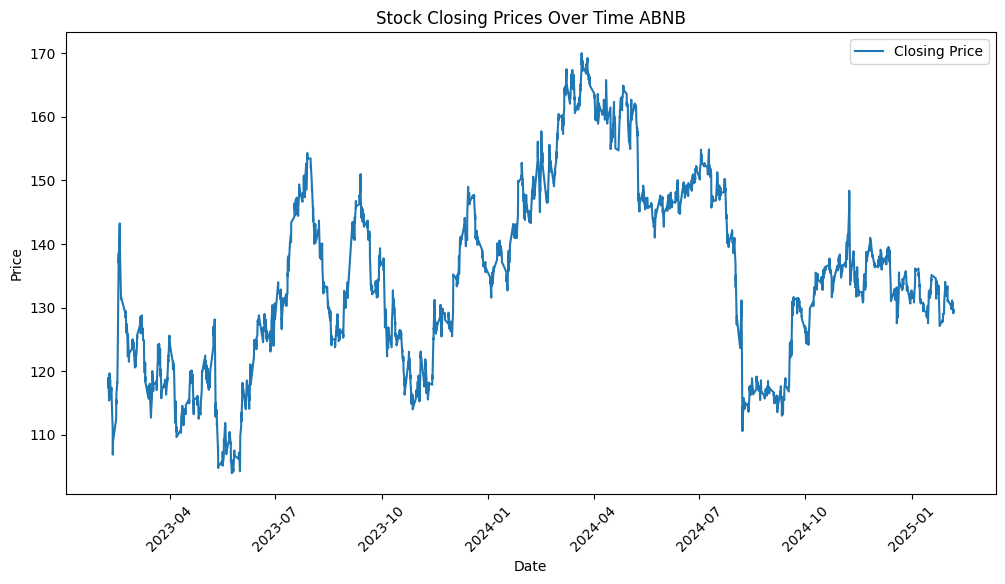

In [28]:
# Address outliers ABNB
sns.boxplot(data=ABNB_df_mr["Close"])
plt.title("Boxplot for Closing Prices")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(ABNB_df_mr["Date"], ABNB_df_mr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time ABNB")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [29]:
# Using the iterquantile range , Identify the theresholds

# 75th percentile
seventy_fifth = ABNB_df_mr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = ABNB_df_mr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


21.874998092651367


In [30]:
## Identifying outliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
178.71124362945557 91.2112512588501


#### Handling Outliers , replace with mean

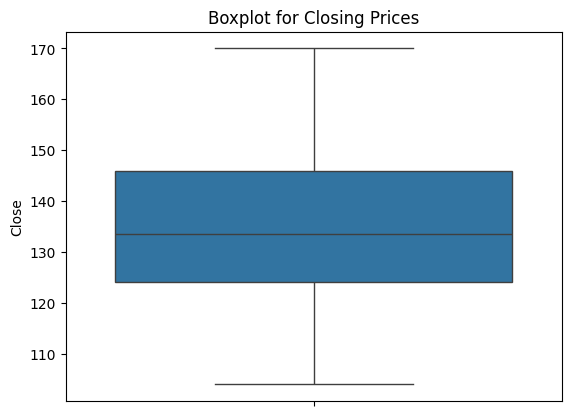

In [31]:
mean_close = ABNB_df_mr[( ABNB_df_mr['Close'] >= lower) & ( ABNB_df_mr['Close'] <= upper)]['Close'].mean()
ABNB_df_mr.loc[(ABNB_df_mr['Close'] < lower) | ( ABNB_df_mr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers ABNB

sns.boxplot(data = ABNB_df_mr["Close"])
plt.title("Boxplot for Closing Prices")
plt.show()

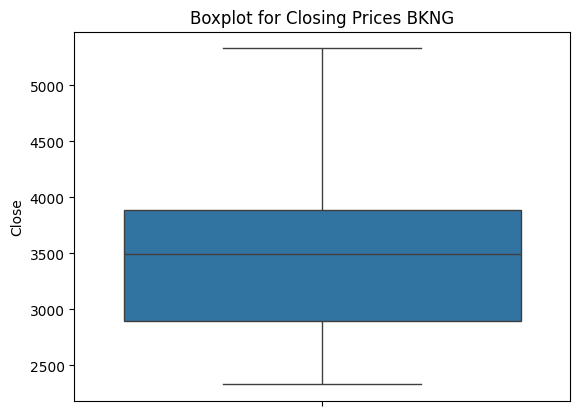

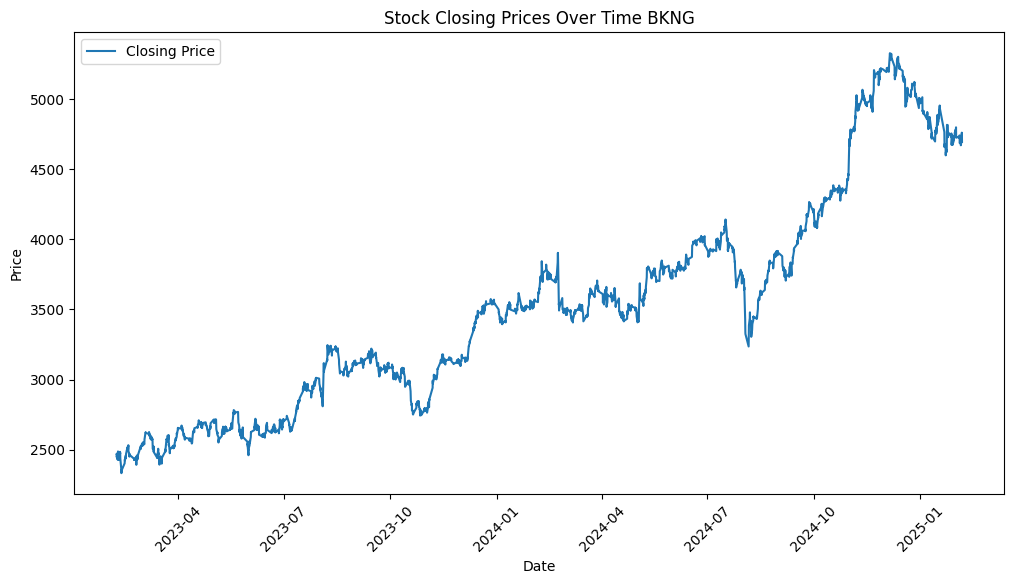

In [32]:
# Adressing outlier BKNG
sns.boxplot(data=BKNG_df_mr["Close"])
plt.title("Boxplot for Closing Prices BKNG")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(BKNG_df_mr["Date"], BKNG_df_mr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time BKNG")
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [33]:
# Using the iterquantile range , Identify the theresholds

# 75th percentile
seventy_fifth = BKNG_df_mr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = BKNG_df_mr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


989.074951171875


In [34]:
## Identifying outliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)


Outliers based on IQR:
5370.499938964844 1414.2001342773438


Handling Outliers , replace with mean


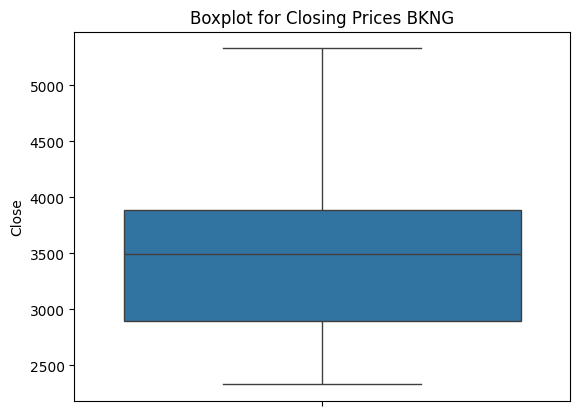

In [35]:
mean_close = BKNG_df_mr[( BKNG_df_mr['Close'] >= lower) & ( BKNG_df_mr['Close'] <= upper)]['Close'].mean()
BKNG_df_mr.loc[(BKNG_df_mr['Close'] < lower) | ( BKNG_df_mr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers BKNG

sns.boxplot(data = BKNG_df_mr["Close"])
plt.title("Boxplot for Closing Prices BKNG")
plt.show()

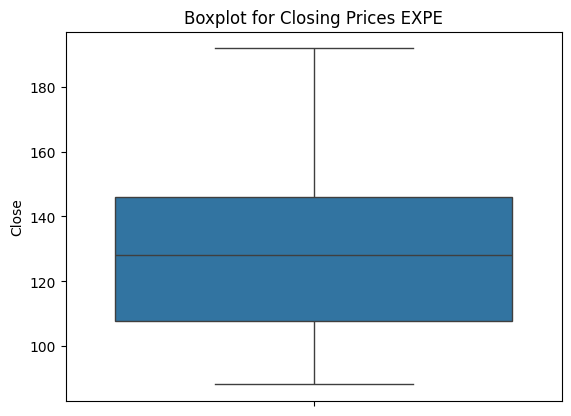

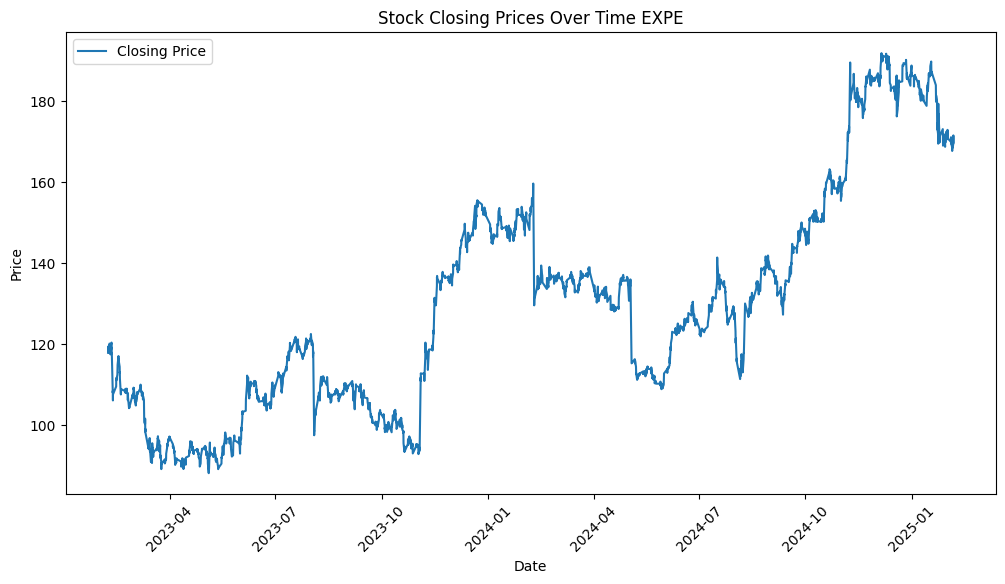

In [36]:
# Adressing outlier EXPE
sns.boxplot(data=EXPE_df_mr["Close"])
plt.title("Boxplot for Closing Prices EXPE")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(EXPE_df_mr["Date"], EXPE_df_mr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time EXPE")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [37]:
# Using the iterquantile range , Identify the theresholds

# 75th percentile
seventy_fifth = EXPE_df_mr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = EXPE_df_mr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


38.17499542236328


In [38]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
203.29748916625977 50.59750747680664


Handling Outliers , replace with mean

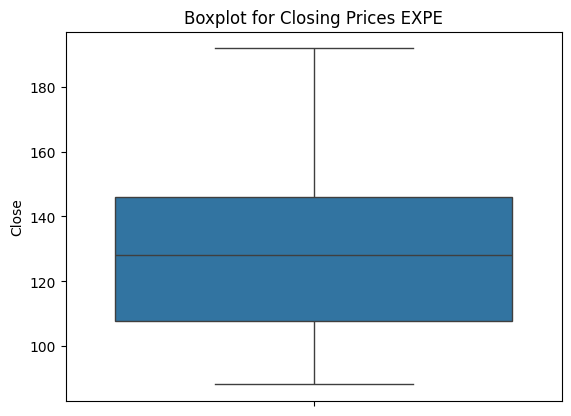

In [39]:
mean_close = EXPE_df_mr[( EXPE_df_mr['Close'] >= lower) & ( EXPE_df_mr['Close'] <= upper)]['Close'].mean()
EXPE_df_mr.loc[(EXPE_df_mr['Close'] < lower) | ( EXPE_df_mr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers EXPE

sns.boxplot(data = EXPE_df_mr["Close"])
plt.title("Boxplot for Closing Prices EXPE")
plt.show()

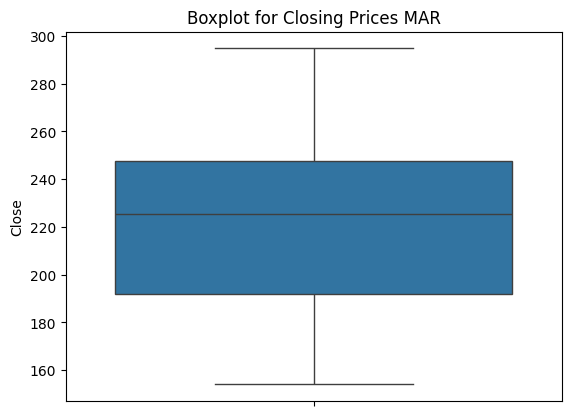

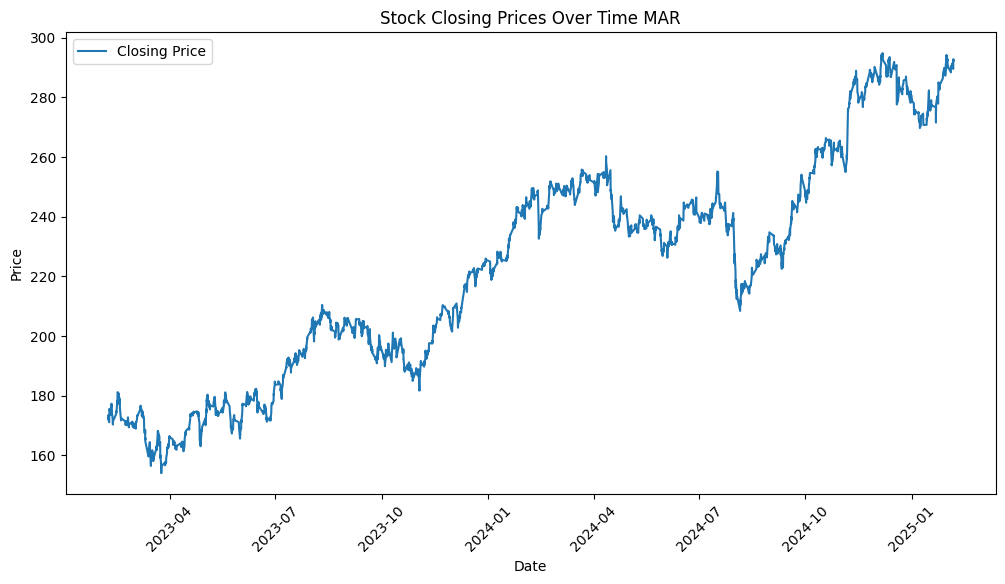

In [40]:
# Adressing outlier MAR
sns.boxplot(data=MAR_df_mr["Close"])
plt.title("Boxplot for Closing Prices MAR")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(MAR_df_mr["Date"], MAR_df_mr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time MAR")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [41]:
# Using the iterquantile range , Identify the theresholds

# 75th percentile
seventy_fifth = MAR_df_mr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = MAR_df_mr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


55.72627258300781


In [42]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
331.25318145751953 108.34809112548828


Handling Outliers , replace with mean

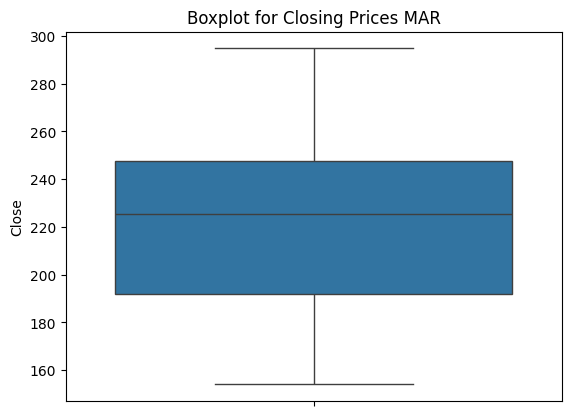

In [43]:
mean_close = MAR_df_mr[( MAR_df_mr['Close'] >= lower) & ( MAR_df_mr['Close'] <= upper)]['Close'].mean()
MAR_df_mr.loc[(MAR_df_mr['Close'] < lower) | ( MAR_df_mr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers MAR

sns.boxplot(data = MAR_df_mr["Close"])
plt.title("Boxplot for Closing Prices MAR")
plt.show()

In [44]:
# clean the data

# Exploratory Data Analysis (EDA):

## Univariate Analysis:

### Calculate summary statistics
(mean, median, standard deviation, etc.) for each stock in a given period for example for the last one year, for the last
one month, for the last one week, five days etc.

In [45]:
## Calculate summary statistics
combine_stock_df.describe().round(2)

Close      High       Low      Open       Volume
count  13976.00  13976.00  13976.00  13976.00     13976.00
mean     998.22   1001.30    994.90    998.11    272876.20
std     1497.12   1501.45   1492.45   1496.97    414857.95
min       88.23     88.90     87.94     88.19         0.00
25%      132.10    132.63    131.50    132.06     61124.75
50%      172.46    173.24    171.80    172.46    170258.50
75%      803.96    808.67    803.12    804.15    344037.00
max     5330.00   5337.24   5313.52   5329.38  14838099.00

In [46]:
# Descriptive Statistics for each stock
descriptive_stat = combine_stock_df.groupby('Stock')['Close'].describe()
print(descriptive_stat)

        count         mean         std          min          25%          50%  \
Stock                                                                           
ABNB   3494.0   134.715950   14.579799   103.959999   124.023748   133.592506   
BKNG   3494.0  3507.206596  750.972592  2331.360107  2897.812561  3490.574951   
EXPE   3494.0   129.048855   26.835445    88.230003   107.860001   128.195000   
MAR    3494.0   221.899599   36.528521   153.970001   191.937500   225.532501   

               75%          max  
Stock                            
ABNB    145.898746   169.979996  
BKNG   3886.887512  5330.000000  
EXPE    146.034996   191.830002  
MAR     247.663773   294.820007  


Let's see the result of each stock:

1. ABNB (Airbnb) Stock:

    Count: 3495 data points.
    Mean: The average closing price is approximately $134.59. This suggests that, on average, the stock price has hovered around this value over the observed period.
    Standard Deviation (Std): The stock's price has fluctuated with a standard deviation of $14.68, indicating a moderate amount of volatility.
    Minimum (Min): The lowest recorded closing price during this period was $103.96.
    25th Percentile (25%): The 25th percentile price was $123.53, meaning 25% of the data points are below this value.
    Median (50%): The median closing price, or the 50th percentile, was $133.59. This is the middle value when the data is ordered, indicating that half of the prices were below this value and half were above.
    75th Percentile (75%): The 75th percentile price was $145.90, meaning 75% of the prices were below this level.
    Maximum (Max): The highest recorded closing price was $169.98.

2. BKNG (Booking Holdings) Stock:

    Count: 3495 data points.
    Mean: The average closing price is much higher at $3489.23, which is typical for a high-value stock like Booking Holdings.
    Standard Deviation (Std): The standard deviation is $749.06, indicating high volatility compared to ABNB.
    Minimum (Min): The lowest price observed was $2331.36.
    25th Percentile (25%): The 25th percentile price was $2847.75, meaning 25% of the stock prices were lower than this value.
    Median (50%): The median price was $3483.86, which is very close to the mean, suggesting the data is fairly symmetric.
    75th Percentile (75%): The 75th percentile price was $3865.85.
    Maximum (Max): The highest price recorded was $5330.00, which represents a significant spike compared to the other observations.

3. EXPE (Expedia) Stock:

    Count: 3495 data points.
    Mean: The average closing price is $128.64, which is similar to ABNB but lower than BKNG.
    Standard Deviation (Std): The standard deviation of $26.61 suggests a slightly higher volatility compared to ABNB but less than BKNG.
    Minimum (Min): The lowest recorded closing price was $88.23.
    25th Percentile (25%): The 25th percentile was $107.86.
    Median (50%): The median closing price was $127.16, close to the mean, showing a relatively symmetric distribution of prices.
    75th Percentile (75%): The 75th percentile price was $145.45.
    Maximum (Max): The highest recorded closing price was $191.83.

4. MAR (Marriott International) Stock:

    Count: 3495 data points.
    Mean: The average closing price is $220.99.
    Standard Deviation (Std): The standard deviation is $36.26, indicating moderate volatility compared to the other stocks.
    Minimum (Min): The lowest closing price was $153.97.
    25th Percentile (25%): The 25th percentile was $191.20.
    Median (50%): The median closing price was $224.71, which is very close to the mean, indicating a symmetric distribution.
    75th Percentile (75%): The 75th percentile was $247.08.
    Maximum (Max): The highest closing price recorded was $294.82.

Summary:

    ABNB has a moderate average closing price with relatively low volatility compared to the other stocks.
    BKNG has the highest average closing price, along with significant volatility (as indicated by the high standard deviation), which could be attributed to large fluctuations in the stock price.
    EXPE is positioned in between ABNB and BKNG, with moderate average pricing and volatility.
    MAR shows a slightly higher average price than ABNB, with relatively moderate volatility.

These descriptive statistics can help investors assess the general price behavior and volatility of these stocks over the observed period.


###  ■ Visualize price trends using line charts and box plots.

<Axes: xlabel='Date', ylabel='Stock'>

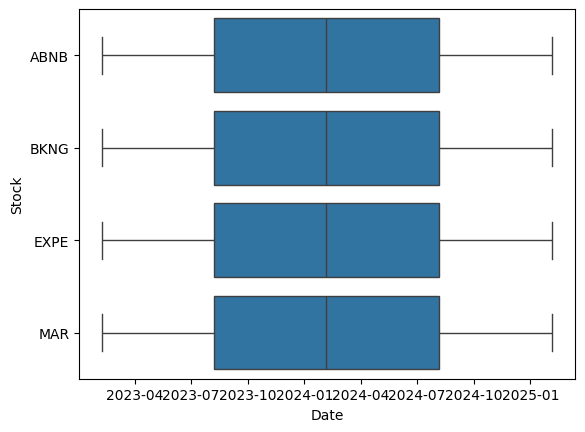

In [47]:
sns.boxplot(data=combine_stock_df, x='Date', y="Stock")

### Comparing the Data


###  ○ Bivariate Analysis:
*  ■ Calculate and visualize correlations between the prices of different stock.
*  ■ Analyze the relationship between price and trading volume.

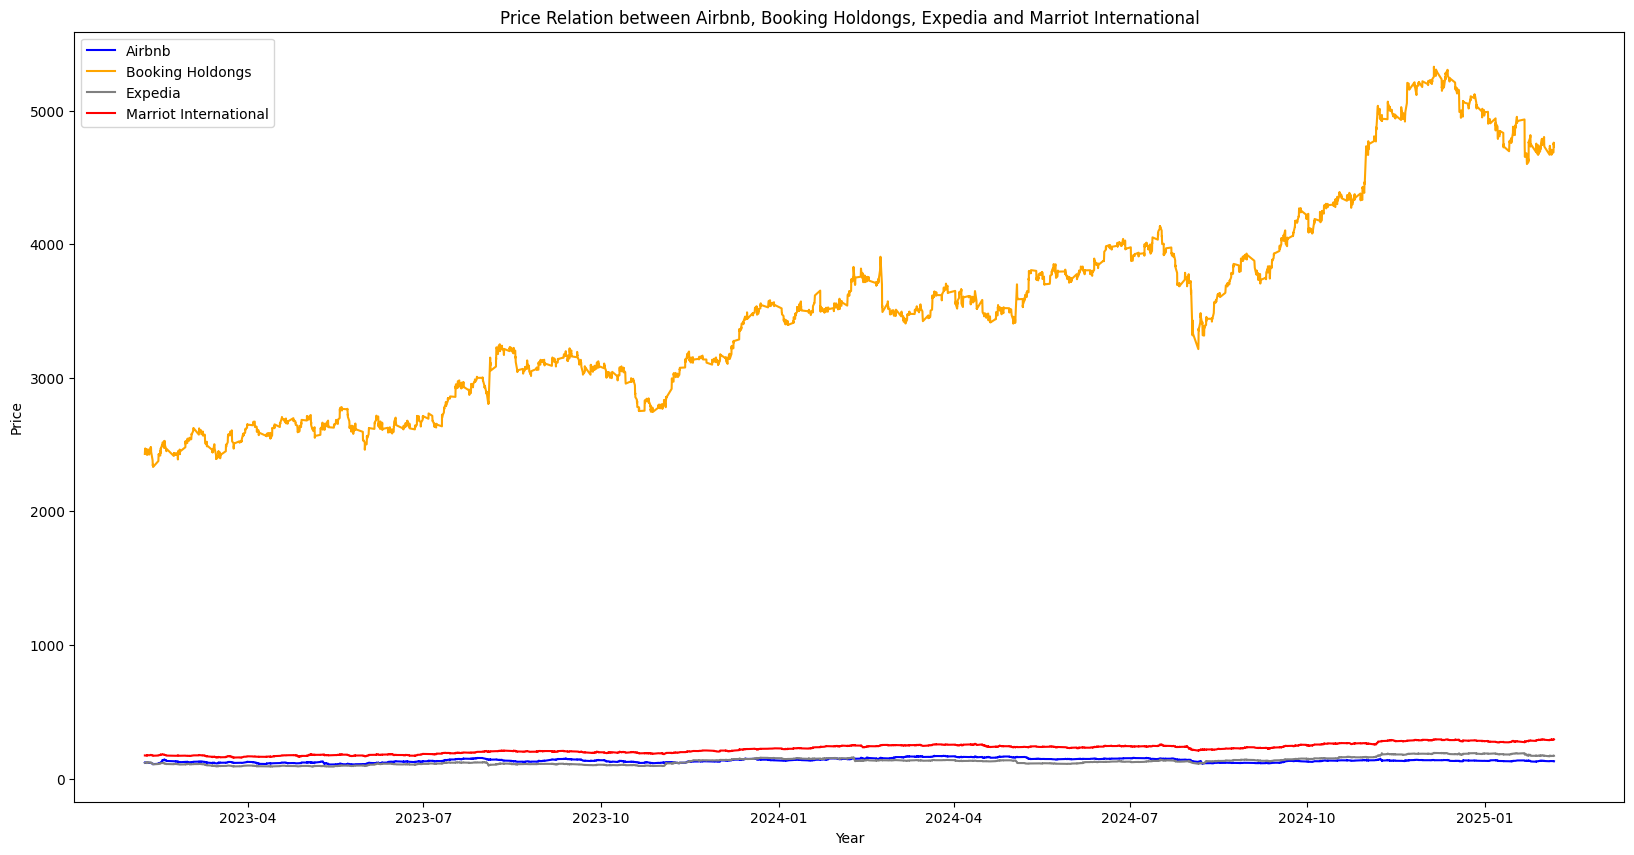

In [48]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_mr['Date'],ABNB_df_mr['Open'], color='blue', label='Airbnb')
plt.plot(BKNG_df_mr['Date'],BKNG_df_mr['Open'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_mr['Date'],EXPE_df_mr['Open'], color='gray', label='Expedia')
plt.plot(MAR_df_mr['Date'],MAR_df_mr['Open'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()


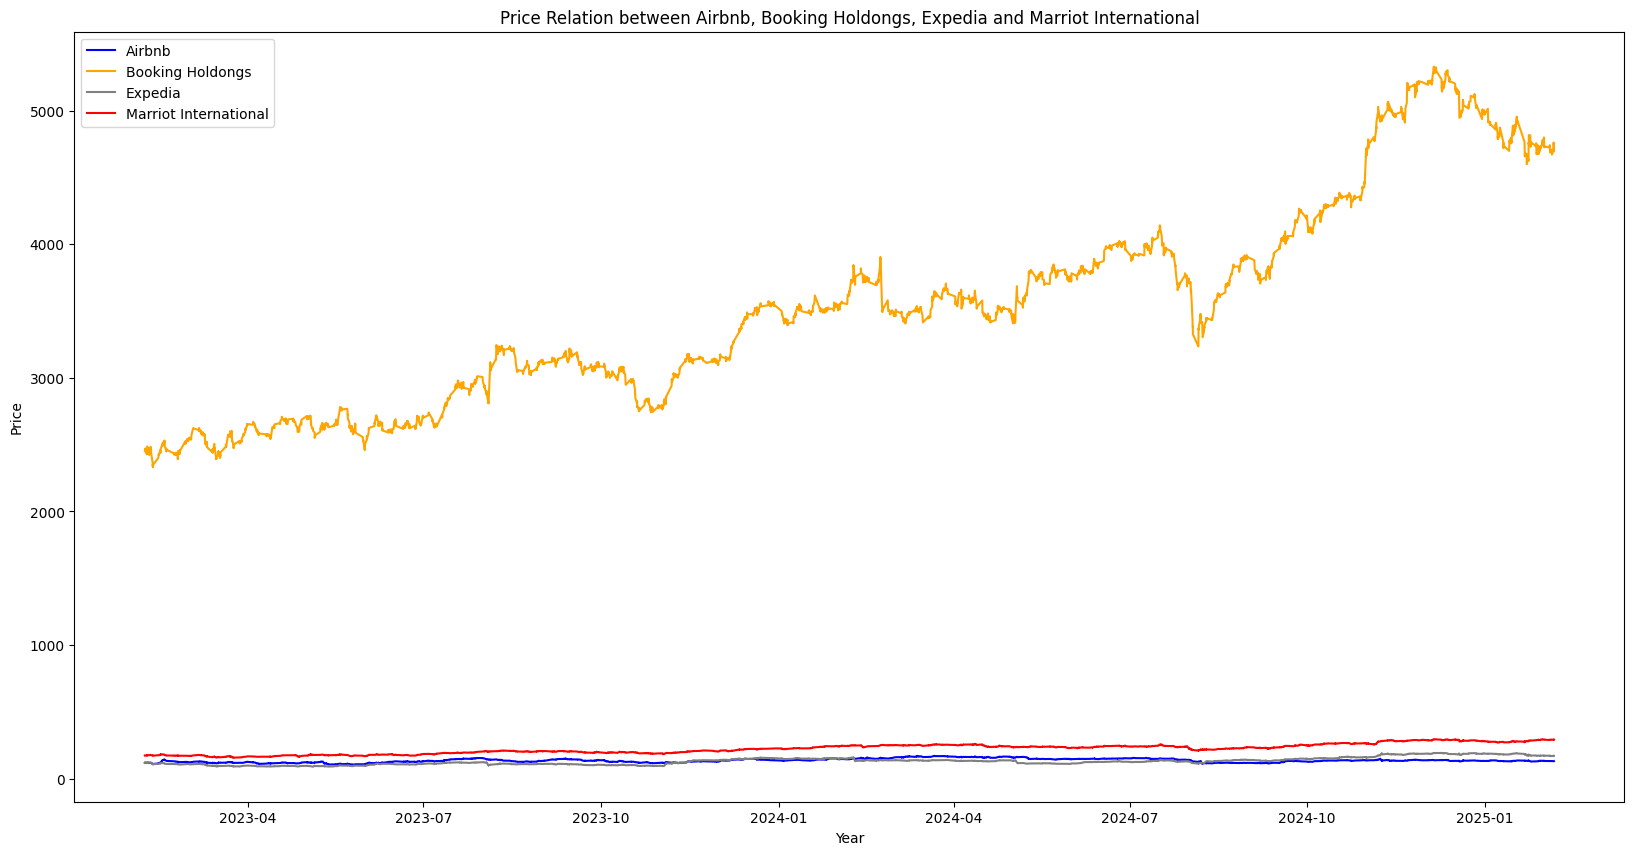

In [49]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_mr['Date'],ABNB_df_mr['Close'], color='blue', label='Airbnb')
plt.plot(BKNG_df_mr['Date'],BKNG_df_mr['Close'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_mr['Date'],EXPE_df_mr['Close'], color='gray', label='Expedia')
plt.plot(MAR_df_mr['Date'],MAR_df_mr['Close'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()

according to the graph above , the price of Booking Holdongs is significantly higher than the others. Marriot International's pricing has been generally upward from its begnning.

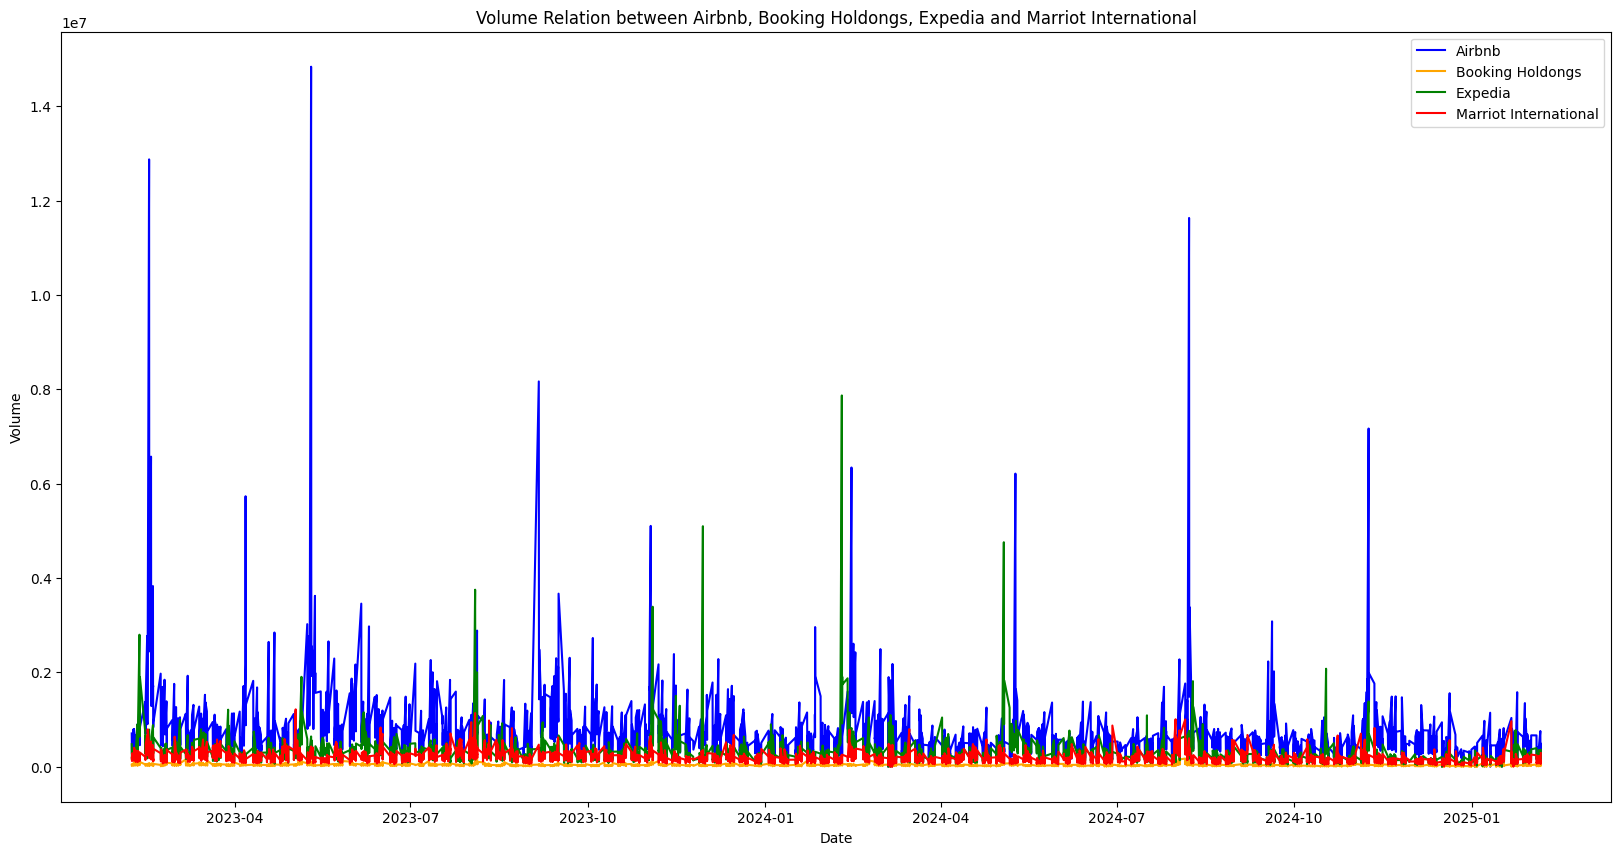

In [50]:
# Volume Comparision
plt.figure(figsize=(20,10))
plt.plot(ABNB_df_mr['Date'],ABNB_df_mr['Volume'], color='blue', label='Airbnb')
plt.plot(BKNG_df_mr['Date'],BKNG_df_mr['Volume'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_mr['Date'],EXPE_df_mr['Volume'], color='green', label='Expedia')
plt.plot(MAR_df_mr['Date'],MAR_df_mr['Volume'], color='red', label='Marriot International')

plt.title("Volume Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Date")
plt.ylabel('Volume')
plt.legend(title="")

plt.show()

-> Airbnb (Blue Line) appears to have the highest trading volume fluctuations, with multiple sharp peaks indicating periods of high activity.
Marriott International (Red Line)and Expedia (Green Line) show moderate trading activity, with occasional spikes.
 Booking Holdings (Orange Line) has the lowest volume activity, as it remains relatively stable and closer to the bottom.
There are periodic spikes in trading volume, likely corresponding to major market events, earnings reports, or industry-specific news affecting these companies.
The overall trend suggests that Airbnb experiences more significant trading volume swings compared to the other companies.

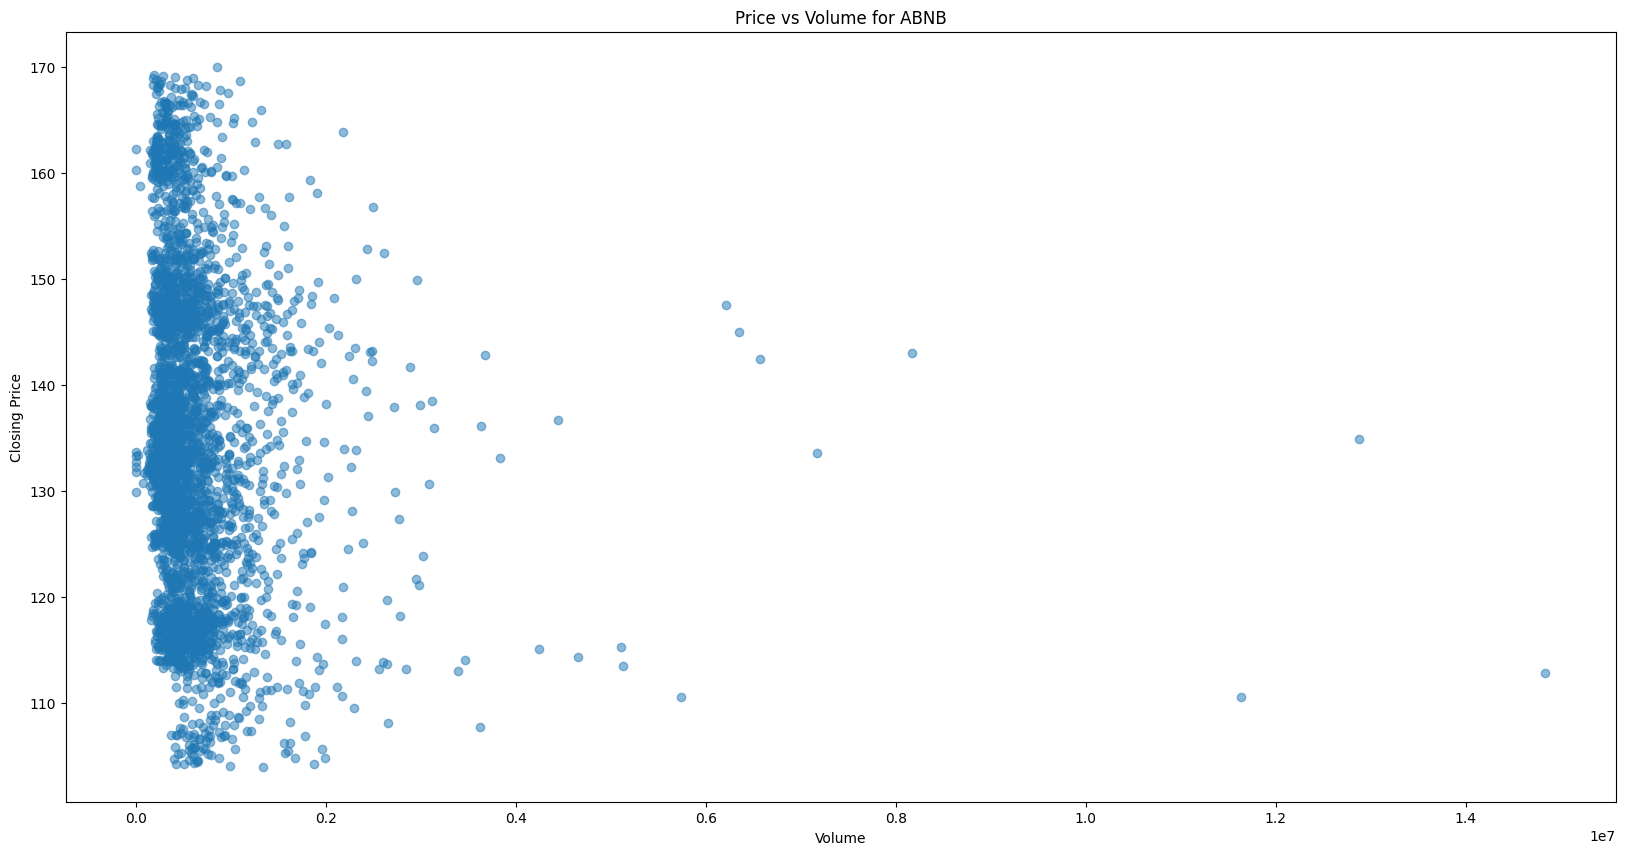

In [51]:
# Volume Comparision
#ABNB
plt.figure(figsize=(20,10))
plt.scatter(ABNB_df_mr['Volume'], ABNB_df_mr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume for ABNB")
#plt.plot(ABNB_df_sr['Close'],ABNB_df_sr['Volume'], color='blue', label='Airbnb') # Added color='blue'
#plt.plot(BKNG_df_sr['Close'],BKNG_df_sr['Volume'], color='orange', label='Booking Holdongs')
#plt.plot(EXPE_df_sr['Close'],EXPE_df_sr['Volume'], color='green', label='Expedia')
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')


plt.show()
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')





##Observations:
    High Density at Low Volume – The majority of the data points are clustered at low trading volumes (close to 0), suggesting that most daily trading activities occur at relatively low volumes.
    Closing Price Range – The closing prices predominantly range between $110 and $170, indicating that Airbnb's stock has experienced variations within this range.
    Outliers at Higher Volumes – A few scattered points at higher trading volumes (above 1 million shares) suggest that there were specific days of exceptionally high trading activity, possibly due to earnings releases, market news, or external economic events.
    No Strong Correlation Apparent – The plot does not show a clear trend or linear relationship between volume and closing price, meaning that price changes are not necessarily dependent on trading volume.

##Key Insights:
    The majority of Airbnb's trading activity happens at low volumes with varied closing prices.
    Rare high-volume spikes indicate occasional significant trading days.
    No strong direct relationship between volume and price is visible in this scatter plot.

Text(0.5, 1.0, 'Price vs Volume for BKNG')

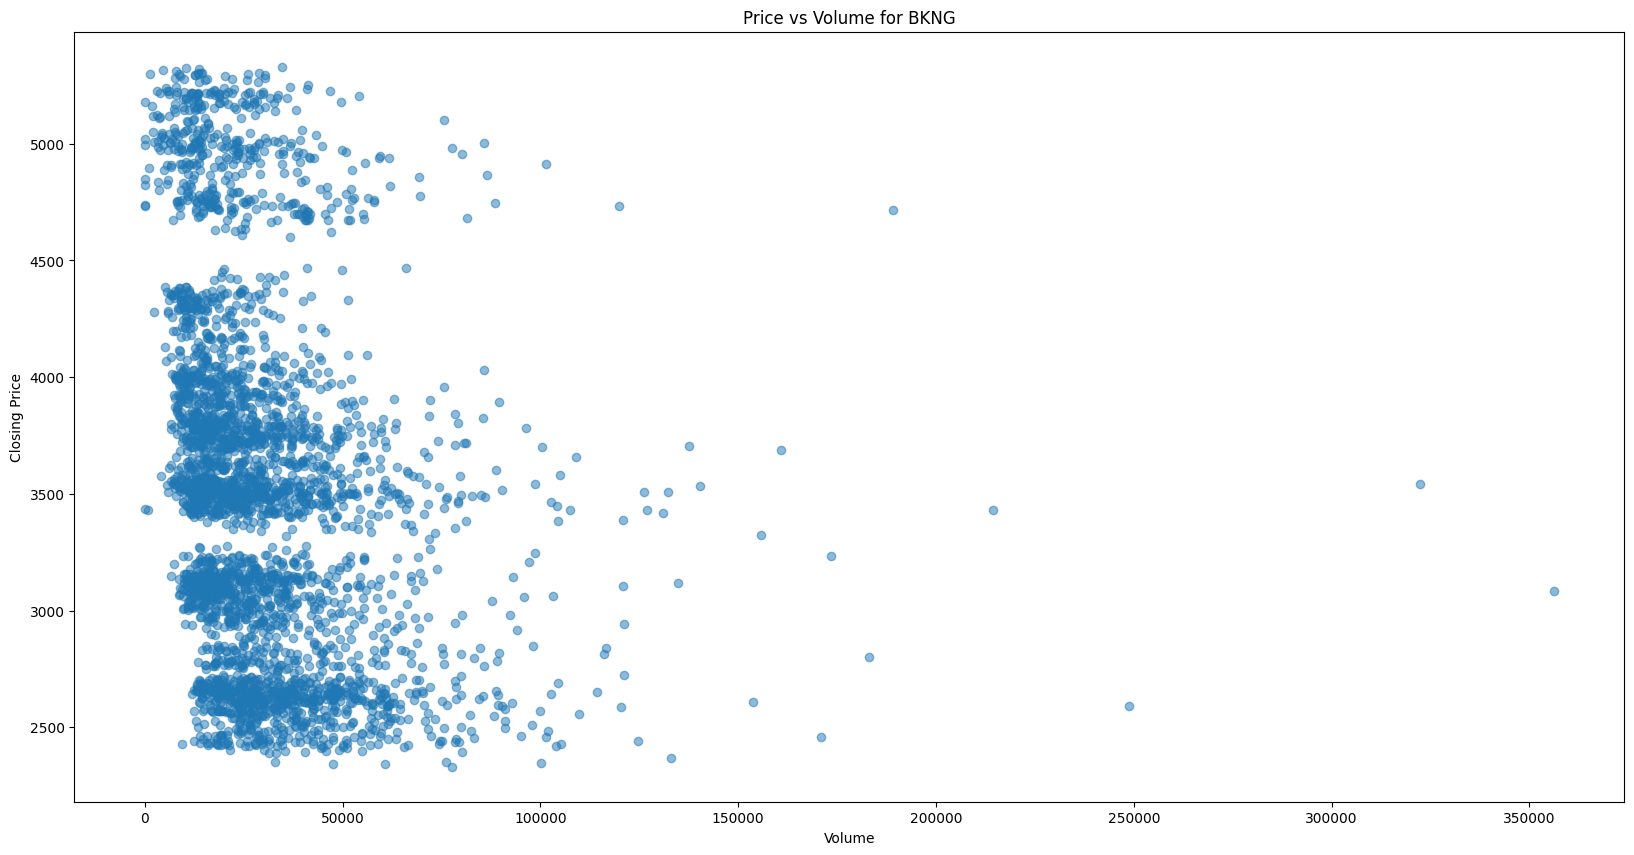

In [52]:
#BKNG
plt.figure(figsize=(20,10))
plt.scatter(BKNG_df_mr['Volume'], BKNG_df_mr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume for BKNG")


##Observations:
    High Concentration at Low Volumes – The majority of the data points are clustered on the left side of the chart, indicating that most trades occur at low volume levels.
    Wide Price Range – The stock price fluctuates significantly between $2,500 and $5,200, indicating a substantial variation in stock valuation over time.
    Distinct Price Levels – The distribution of points appears to form horizontal bands, suggesting that the stock price stabilizes at certain levels before moving.
    Sparse High-Volume Trades – A few instances of high trading volume (towards the right side of the chart) are visible, but these occur infrequently.
    No Strong Correlation Between Volume and Price – The scattered nature of the data suggests that higher trading volumes do not necessarily drive significant price changes.
##Conclusion:
The scatter plot indicates that BKNG’s stock price movements are largely independent of trading volume, with most trading happening at low volumes. The price is distributed across distinct levels, possibly indicating periods of stability or resistance.


Text(0.5, 1.0, 'Price vs Volume for EXPE')

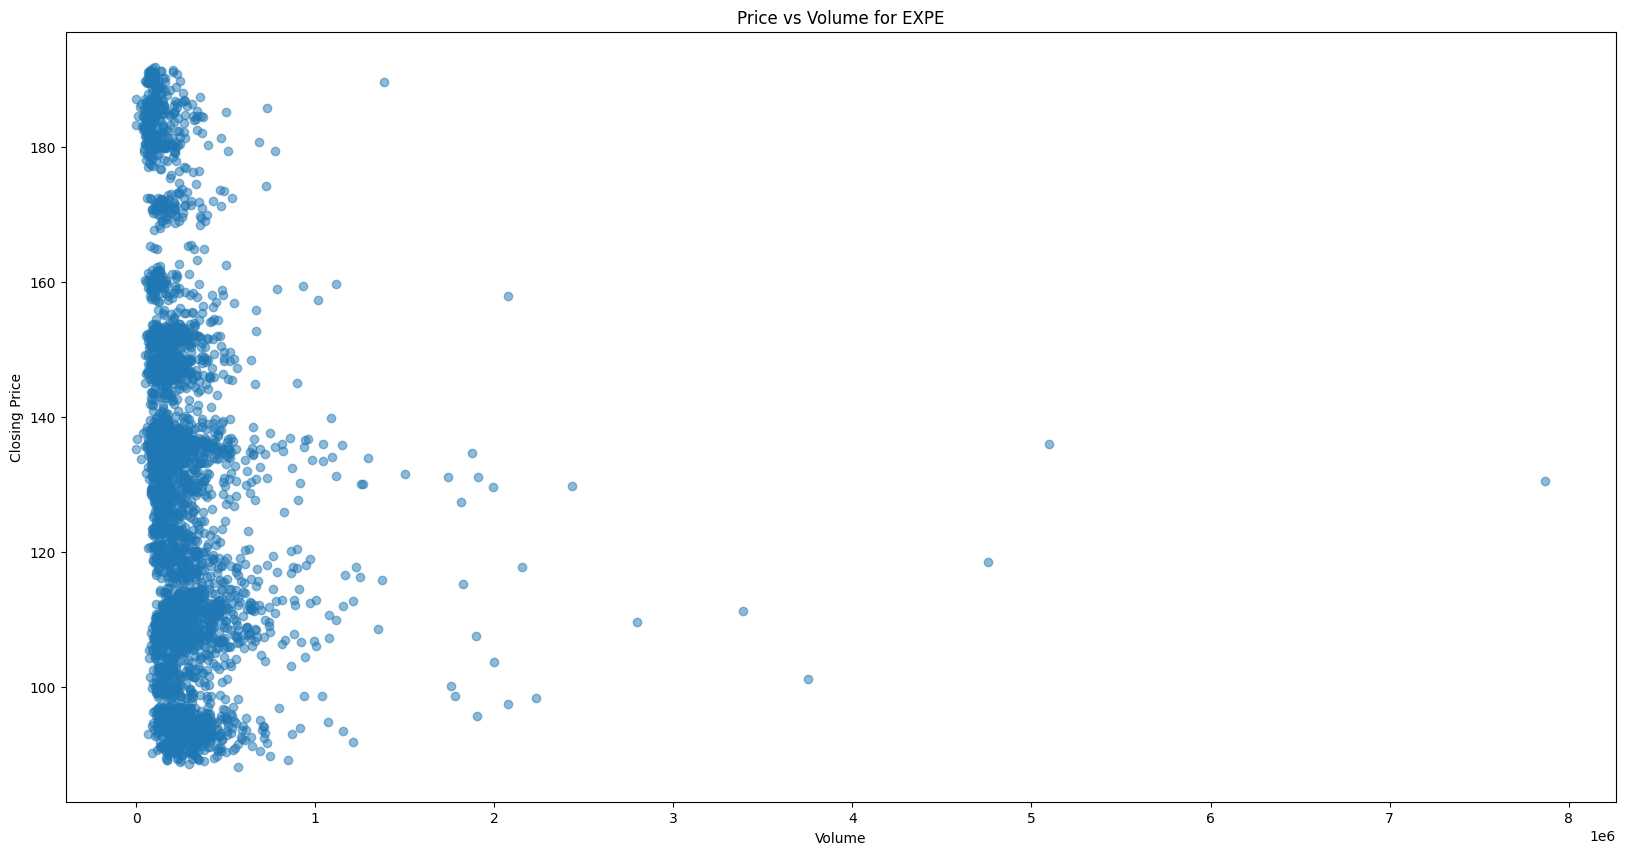

In [53]:
#EXPE
plt.figure(figsize=(20,10))
plt.scatter(EXPE_df_mr['Volume'], EXPE_df_mr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume for EXPE")


##Overview:
The scatter plot visualizes the relationship between the closing price and trading volume for EXPE (Expedia Group Inc.). The x-axis represents trading volume, while the y-axis represents closing price over a given period.
in the above scattered plot it shows:
    High Concentration at Low Volume – The majority of the data points are clustered towards the left side of the chart, indicating that most trading activity occurs at low volumes.
    Price Range – The closing prices are mostly distributed between $100 and $180, showing price variations over time.
    Sparse High-Volume Trades – There are only a few instances where high trading volume (towards the right side of the chart) is observed. These points suggest occasional spikes in trading activity but do not show a clear correlation with price changes.
    Lack of Strong Correlation – The scattered nature of the points suggests that volume does not have a strong direct impact on the closing price. There is no clear trend indicating that higher volume leads to higher or lower prices.
Conclusion:
The scatter plot suggests that EXPE’s price movement is relatively independent of trading volume, with most trading occurring at low volumes. However, occasional high-volume transactions are present but do not seem to significantly influence the price trend. Further statistical analysis would be needed to confirm if any underlying pattern exists.


Text(0.5, 1.0, 'Price vs Volume for MAR')

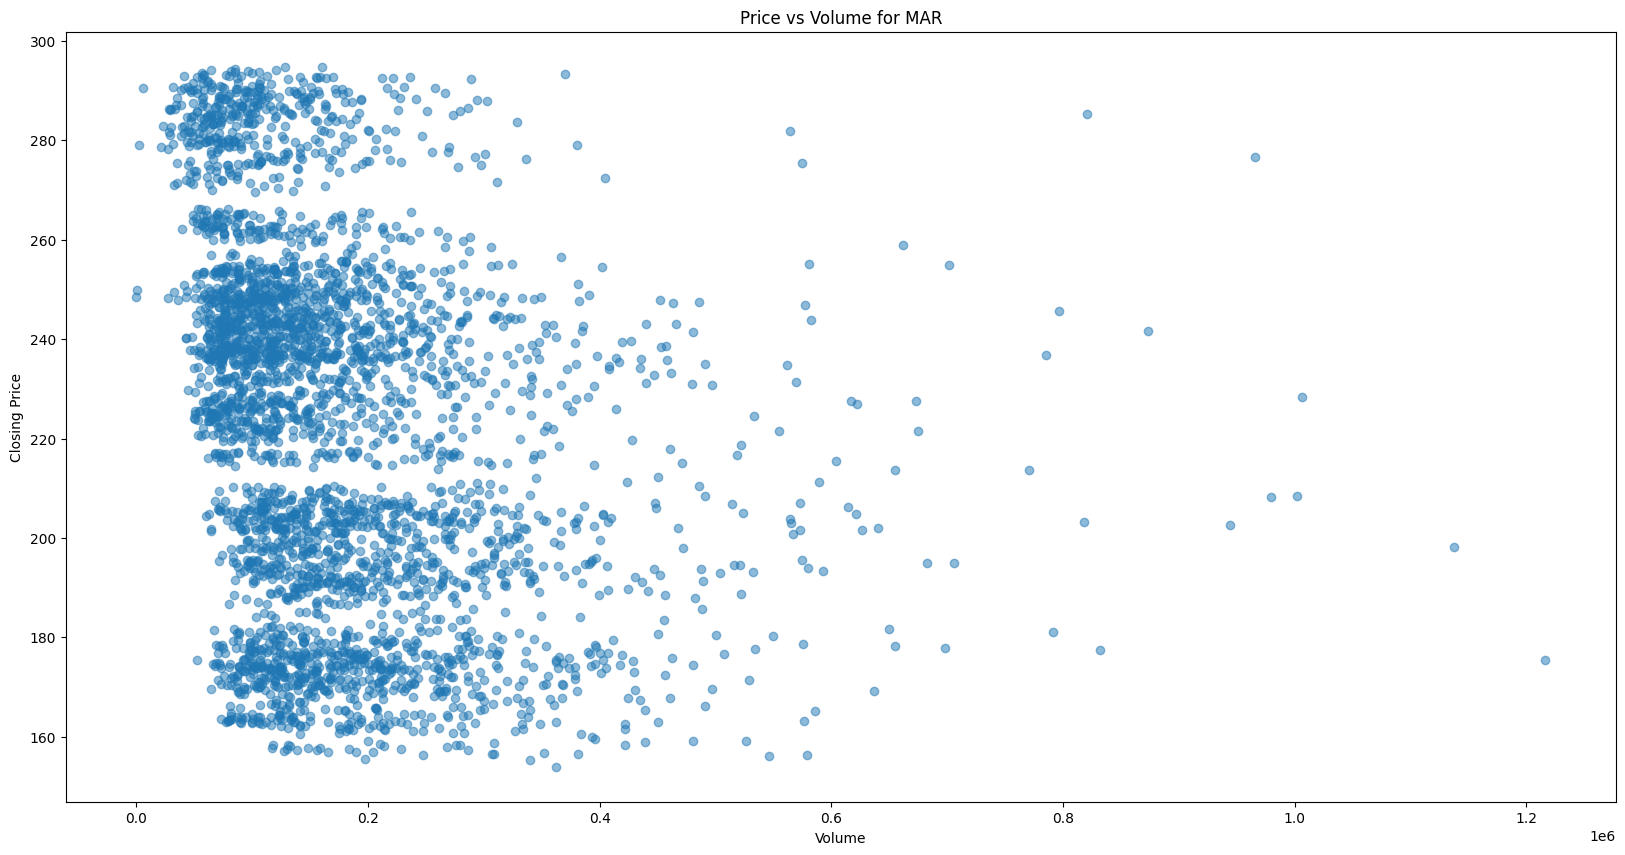

In [54]:
#MAR
plt.figure(figsize=(20,10))
plt.scatter(MAR_df_mr['Volume'], MAR_df_mr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume for MAR")

##Observations:
    Clustered Data at Low Volume – A high density of data points is concentrated towards the left side of the chart, indicating that most trading occurs at low volumes.
    Price Range – The closing prices mainly fluctuate between $160 and $290, suggesting a significant range of stock price movements.
    Discrete Price Levels – Unlike a continuous spread, the data points appear somewhat grouped at specific price levels, indicating possible periods of price stabilization or resistance levels.
    Sparse High-Volume Transactions – Some data points on the right suggest occasional spikes in trading volume, but these instances are relatively rare.
    No Strong Correlation Between Volume and Price – The scatter distribution does not indicate a clear trend suggesting that higher trading volume directly influences price changes. The price variations occur across different volume levels without a distinct pattern.
when we summerize:
The scatter plot suggests that MAR’s stock price movement is largely independent of trading volume. Most trading occurs at lower volumes, and the price distribution appears in distinct bands rather than a smooth trend.

### Time Series Analysis : to examine trends and patterns over time, focussing on the closing Prices

In [55]:
## Time Series Analysis
pivot_data = combine_stock_df.pivot(index='Date', columns='Stock', values='Close')

#create s subplot
fig = make_subplots(rows=1, cols=1)

#Add traces for each stock
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )
#update layout
fig.update_layout(
    title_text='Time series of closing Prices',
    xaxis_title = 'Date',
    yaxis_title = 'Closing Price',
    legend_title="Ticker",
    showlegend = True
)

# Show the plot
fig.show()

### - Volatility Analysis
We will calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [56]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

### Correlation Analysis
to understand how the stock prices of these companies are related to each other

In [57]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Stock',
    yaxis_title='Stock'
)

# Show the figure
fig.show()

The heatmap above displays the correlation matrix of the closing prices of the four stocks (ABNB, BKNG, EXPE, MAR). Here’s what the correlation coefficients suggest:

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicates poor correlation.

- From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, BKNG and EXPE seem to have a relatively higher positive correlation (0.89
).

#### Comparative Analysis
In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [58]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Stock'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

#### Daily Risk Vs. Return Analysis
- To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

In [59]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

The scatter plot in the image represents a Risk vs. Return Analysis of different stocks, with Risk (Standard Deviation)on the x-axis and Average Daily Return on the y-axis. The analysis likely evaluates the trade-off between risk and return for various stocks in the market.
Key Observations:
 1 Stock Performance:
 ◦ The stock labeled "BKNG" (Booking Holdings) exhibits the highest average daily return, indicating strong performance.
 ◦ "MAR" (Marriott International) follows closely in terms of return but with slightly lower risk.
 ◦ "EXPE" (Expedia Group) has a higher risk level but also a reasonable return.
 ◦ "ABNB" (Airbnb) shows the highest risk level among the plotted stocks but with relatively lower returns.
 2 Risk-Return Relationship:
 ◦ The stocks with higher returns (such as BKNG and MAR) generally have moderate risk levels.
 ◦ EXPE and ABNB are positioned further to the right on the risk scale, meaning they have higher volatility.
 ◦ The plot suggests a mixed risk-return tradeoff, with some stocks (e.g., MAR) offering relatively high returns with lower risk compared to others.
 3 Investment Implications:
 ◦ Investors seeking higher returns with moderate risk may consider stocks like BKNG and MAR.
 ◦ Those with a higher risk appetite may explore stocks like EXPE and ABNB for potential gains.
 ◦ Risk-averse investors should focus on stocks with lower standard deviations while still offering competitive returns.
Conclusion:
This risk-return analysis provides a useful visualization of stock performance, helping investors balance risk exposure with potential returns. Stocks like BKNG and MAR stand out as attractive options due to their high return potential with relatively lower risk.

# Predictive Modeling

* Feature Engineering:
> Create new features (moving averages, price momentum, volatility indicators) to improve model performance.

### Feature Engineering

In [60]:
# adding moving average as features for ABNB

ABNB_df_mr['MA_10'] = ABNB_df_mr['Close'].rolling(window=10).mean()
ABNB_df_mr['MA_50'] = ABNB_df_mr['Close'].rolling(window=50).mean()

# adding moving average as features for BKNG

BKNG_df_mr['MA_10'] = BKNG_df_mr['Close'].rolling(window=10).mean()
BKNG_df_mr['MA_50'] = BKNG_df_mr['Close'].rolling(window=50).mean()

# adding moving average as features for EXPE

EXPE_df_mr['MA_10'] = EXPE_df_mr['Close'].rolling(window=10).mean()
EXPE_df_mr['MA_50'] = EXPE_df_mr['Close'].rolling(window=50).mean()

# adding moving average as features for MAR

MAR_df_mr['MA_10'] = MAR_df_mr['Close'].rolling(window=10).mean()
MAR_df_mr['MA_50'] = MAR_df_mr['Close'].rolling(window=50).mean()

print(MAR_df_mr.head(3))
MAR_df_mr.tail(3)


                       Date       Close        High         Low        Open  \
0 2023-02-06 14:30:00+00:00  172.990005  173.940002  172.714996  172.720001   
1 2023-02-06 15:30:00+00:00  173.375000  173.591995  172.419998  172.919998   
2 2023-02-06 16:30:00+00:00  172.660004  173.479996  172.619995  173.399994   

   Volume Stock  MA_10  MA_50  
0  191143   MAR    NaN    NaN  
1  155566   MAR    NaN    NaN  
2  139261   MAR    NaN    NaN  


Date       Close        High         Low  \
3491 2025-02-05 18:30:00+00:00  292.799988  292.862488  291.440002   
3492 2025-02-05 19:30:00+00:00  292.670013  293.140015  292.220001   
3493 2025-02-05 20:30:00+00:00  292.368988  292.679993  291.605011   

            Open  Volume Stock       MA_10      MA_50  
3491  291.540009  155432   MAR  291.011496  290.49600  
3492  292.730011  236205   MAR  291.265997  290.58800  
3493  292.679993  288632   MAR  291.415897  290.68898

#### calculate relative Strength Index (RSI)

In [61]:
# calculate RSI: MEASURES stock momentum for ABNB
delta = ABNB_df_mr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()    # 14 is period
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

ABNB_df_mr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

ABNB_df_mr = ABNB_df_mr.dropna()

print(ABNB_df_mr.head(3))

                        Date       Close        High         Low        Open  \
49 2023-02-15 14:30:00+00:00  134.899994  136.649994  129.850006  130.000000   
50 2023-02-15 15:30:00+00:00  136.649994  136.979996  134.250000  134.899994   
51 2023-02-15 16:30:00+00:00  135.934998  137.330002  134.820007  136.649994   

      Volume Stock       MA_10       MA_50         RSI  
49  12873960  ABNB  120.342879  116.322052  102.650306  
50   4438597  ABNB  122.418869  116.705300  102.613060  
51   3139178  ABNB  124.365369  117.045200  106.134349  


In [62]:
print(ABNB_df_mr.head(3))
ABNB_df_mr.tail(3)

                        Date       Close        High         Low        Open  \
49 2023-02-15 14:30:00+00:00  134.899994  136.649994  129.850006  130.000000   
50 2023-02-15 15:30:00+00:00  136.649994  136.979996  134.250000  134.899994   
51 2023-02-15 16:30:00+00:00  135.934998  137.330002  134.820007  136.649994   

      Volume Stock       MA_10       MA_50         RSI  
49  12873960  ABNB  120.342879  116.322052  102.650306  
50   4438597  ABNB  122.418869  116.705300  102.613060  
51   3139178  ABNB  124.365369  117.045200  106.134349  


Date       Close        High         Low  \
3491 2025-02-05 18:30:00+00:00  129.550797  129.809998  129.309998   
3492 2025-02-05 19:30:00+00:00  129.229996  129.550003  129.149994   
3493 2025-02-05 20:30:00+00:00  129.580002  129.695007  129.080002   

            Open  Volume Stock       MA_10       MA_50          RSI  
3491  129.330002  239852  ABNB  130.017996  131.042422  -311.312893  
3492  129.550003  277583  ABNB  129.867996  131.047622  -283.324269  
3493  129.235001  484696  ABNB  129.736996  131.072022 -1784.299763

In [63]:
# calculate RSI: MEASURES stock momentum for BKNG_df_mr
delta = BKNG_df_mr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

BKNG_df_mr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

BKNG_df_mr = BKNG_df_mr.dropna()

print(BKNG_df_mr.head(3))

                        Date        Close         High          Low  \
49 2023-02-15 14:30:00+00:00  2498.895020  2514.939941  2482.020020   
50 2023-02-15 15:30:00+00:00  2490.120117  2503.715088  2485.750000   
51 2023-02-15 16:30:00+00:00  2492.135010  2499.320068  2486.050049   

           Open  Volume Stock        MA_10        MA_50         RSI  
49  2500.000000   75611  BKNG  2456.211499  2435.098721  129.902812  
50  2494.270020   36428  BKNG  2462.897510  2435.872124  150.744972  
51  2490.290039   26904  BKNG  2469.682007  2436.574624  152.870812  


In [64]:
# calculate RSI: MEASURES stock momentum for EXPE_df_mr
delta = EXPE_df_mr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

EXPE_df_mr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

EXPE_df_mr = EXPE_df_mr.dropna()

print(EXPE_df_mr.head(3))

                        Date       Close        High         Low        Open  \
49 2023-02-15 14:30:00+00:00  117.114998  118.339996  115.760002  116.709999   
50 2023-02-15 15:30:00+00:00  116.404999  117.720001  116.019997  117.040001   
51 2023-02-15 16:30:00+00:00  115.320000  116.559998  115.309998  116.370003   

    Volume Stock     MA_10       MA_50         RSI  
49  787760  EXPE  113.3975  115.396048  116.779904  
50  350067  EXPE  113.9250  115.365648  138.551878  
51  263969  EXPE  114.3220  115.296822  162.945911  


In [65]:
# calculate RSI: MEASURES stock momentum for MAR_df_mr
delta = MAR_df_mr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

MAR_df_mr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

MAR_df_mr = MAR_df_mr.dropna()
MAR_df_mr.head(3)

Date       Close        High         Low        Open  \
49 2023-02-15 14:30:00+00:00  180.449997  181.080002  179.179993  180.919998   
50 2023-02-15 15:30:00+00:00  180.250000  180.949997  179.630005  180.479996   
51 2023-02-15 16:30:00+00:00  179.559998  180.300003  179.460007  180.250000   

    Volume Stock       MA_10       MA_50         RSI  
49  500729   MAR  178.198599  174.438342  134.687399  
50  283612   MAR  178.772600  174.583542  139.454299  
51  411484   MAR  179.290599  174.707242  163.033124

#### Save the Cleaned Data

In [66]:
# Export the clened dataseta for further analysis

from google.colab import drive
import pickle
drive.mount('/content/drive')
# Export the cleaned dataset for further analysis

#data_cleaned.to_csv("cleaned_stock_prices.csv", index=False)
#ABNB_df_sr.to_csv("ABNB_df_sr.csv", index=False)
ABNB_df_mr.to_csv('/content/drive/MyDrive/ABNB_df_mr.csv', index=False)
BKNG_df_mr.to_csv('/content/drive/MyDrive/BKNG_df_mr.csv', index=False)
EXPE_df_mr.to_csv('/content/drive/MyDrive/EXPE_df_mr.csv', index=False)
MAR_df_mr.to_csv('/content/drive/MyDrive/MAR_df_mr.csv', index=False)


#Or

ABNB_df_mr.to_pickle('/content/drive/MyDrive/ABNB_df_mr.pkl')
BKNG_df_mr.to_pickle('/content/drive/MyDrive/BKNG_df_mr.pkl')
EXPE_df_mr.to_pickle('/content/drive/MyDrive/EXPE_df_mr.pkl')
MAR_df_mr.to_pickle('/content/drive/MyDrive/MAR_df_mr.pkl')

Mounted at /content/drive


### Model Selection:
> ■ Experiment with different time series forecasting models:
>> *  ■ ARIMA: Autoregressive Integrated Moving Average
>> * ■ LSTM: Long Short-Term Memory (for deep learning)
>> * ■ Prophet: Facebook's time series forecasting library

### LSTM: Long Short-Term Memory (for deep learning)

## Building LSTM for ABNB

In [67]:
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [68]:
# use only 'Close' prices
#close_prices = ABNB_df_mr['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(close_prices)

In [69]:
# Replace infinite values with NaN
ABNB_df_mr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    ABNB_df_mr[column].fillna(ABNB_df_mr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(ABNB_df_mr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-69-ea04b731df7a>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [70]:
print(scaled_df.head())
print(scaled_df.shape)
print(scaled_df.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.468646  0.244547  0.160549  0.213633  0.867629
1  0.495153  0.277121  0.166898  0.213633  0.299135
2  0.484323  0.307664  0.172529  0.213641  0.211562
3  0.513784  0.338512  0.179090  0.213641  0.183146
4  0.516992  0.369739  0.185827  0.213635  0.201090
(3445, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [71]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [72]:
# Prepare data for LSTM with additonal features
scaled_data = scaler.fit_transform(ABNB_df_mr[features])

In [73]:
# Create Sequences

def create_sequences(data, n_steps):
    X,y = [],[]
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

def create_sequences_with_features(data, n_steps):     # for multiple features
    X,y = [],[]
    for i in range(len(data) - n_steps ):
        X.append(data[i:i+n_steps].values) # All features except
        y.append(data.iloc[i+n_steps,0]) # Close as a target
    # return np.array(X), np.array(y)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X,dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [74]:
 # Convert to Pytorch tensors
"""
#X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
"""

'\n#X_train = torch.tensor(X_train, dtype=torch.float32)\nX_test = torch.tensor(X_test, dtype=torch.float32)\ny_train = torch.tensor(y_train, dtype=torch.float32)\ny_test = torch.tensor(y_test, dtype=torch.float32)\n'

In [75]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [76]:
 print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([677, 60, 5])
torch.Size([2708, 60, 5])
torch.Size([677])


torch.Size([2708])

In [77]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([677, 1])


torch.Size([2708, 1])

In [78]:
class LSTM_model(nn.Module):
    def __init__(self, input_size = 1, hidden_size =50, num_layers = 1, output_size = 1, dropout=0.2):
        super(LSTM_model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1) # fully connected layer

    def forward(self, x):
      # Initialize hidden and cell states
      h0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      c0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      out, _ = self.lstm(x, (h0, c0))

      # Fully connected layer on the last time step's output
      out = self.fc(out[:, -1, :])

      return out




In [79]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [80]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.0528
Epoch [20/50], Loss: 0.0325
Epoch [30/50], Loss: 0.0252
Epoch [40/50], Loss: 0.0142
Epoch [50/50], Loss: 0.0055


In [81]:
print(y_test.shape)




torch.Size([677, 1])


In [82]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted = test_outputs.cpu().numpy()
    y_test_actual = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted.shape[0], scaled_df.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual.shape[0], scaled_df.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted = scaler.inverse_transform(predicted_reshaped)[:,0]





Test Loss: 0.0014


In [83]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_abnb_mr.pth')

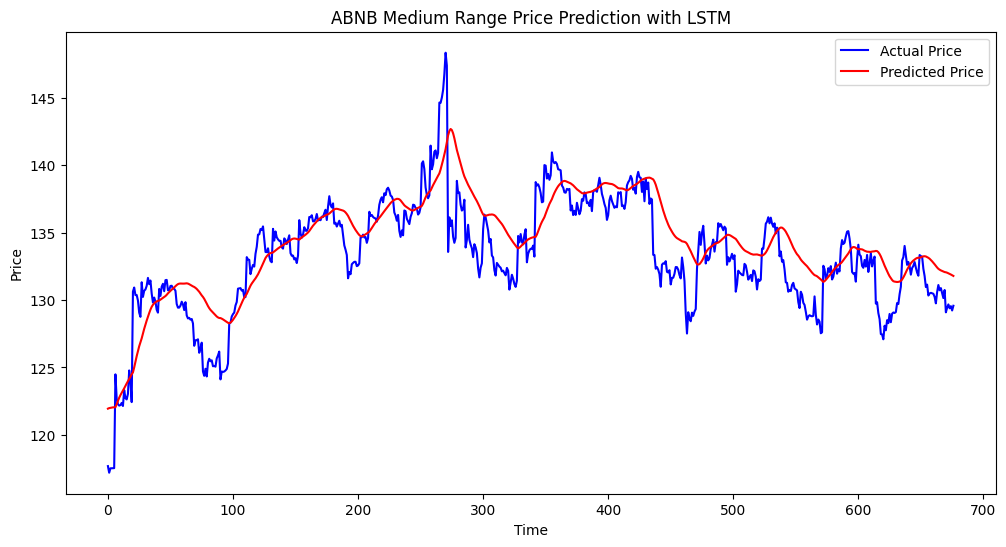

In [84]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predicted, label='Predicted Price', color='red')

plt.title('ABNB Medium Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for ABNB

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
mae = mean_absolute_error(y_test_actual, predicted)
mape = np.mean(np.abs((y_test_actual - predicted) / y_test_actual)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 2.4983
MAE: 1.9318
MAPE: 1.46%


## Building LSTM for BKNG


In [86]:
# Replace infinite values with NaN
BKNG_df_mr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    BKNG_df_mr[column].fillna(BKNG_df_mr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(BKNG_df_mr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_bkng = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-86-b5809e69aacb>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [87]:
print(scaled_df_bkng.head())
print(scaled_df_bkng.shape)
print(scaled_df_bkng.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.036734  0.015280  0.000000  0.500218  0.212286
1  0.033749  0.017593  0.000274  0.500299  0.102276
2  0.034434  0.019940  0.000524  0.500307  0.075536
3  0.037770  0.021470  0.000798  0.500301  0.037979
4  0.040720  0.024011  0.001117  0.500265  0.074739
(3445, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [88]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [89]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_bkng, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [90]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([677, 60, 5])
torch.Size([2708, 60, 5])
torch.Size([677])


torch.Size([2708])

In [91]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape


torch.Size([677, 1])


torch.Size([2708, 1])

In [92]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [93]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0233
Epoch [20/100], Loss: 0.0199
Epoch [30/100], Loss: 0.0140
Epoch [40/100], Loss: 0.0055
Epoch [50/100], Loss: 0.0025
Epoch [60/100], Loss: 0.0009
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0007
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0006


In [94]:
print(y_test.shape)

torch.Size([677, 1])


In [95]:
# Evaluate the model BKNG

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_bkng = test_outputs.cpu().numpy()
    y_test_actual_bkng = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_bkng.shape[0], scaled_df_bkng.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_bkng[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_bkng.shape[0], scaled_df_bkng.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_bkng[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_bkng = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_bkng = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0013


In [96]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_bkng_mr.pth')

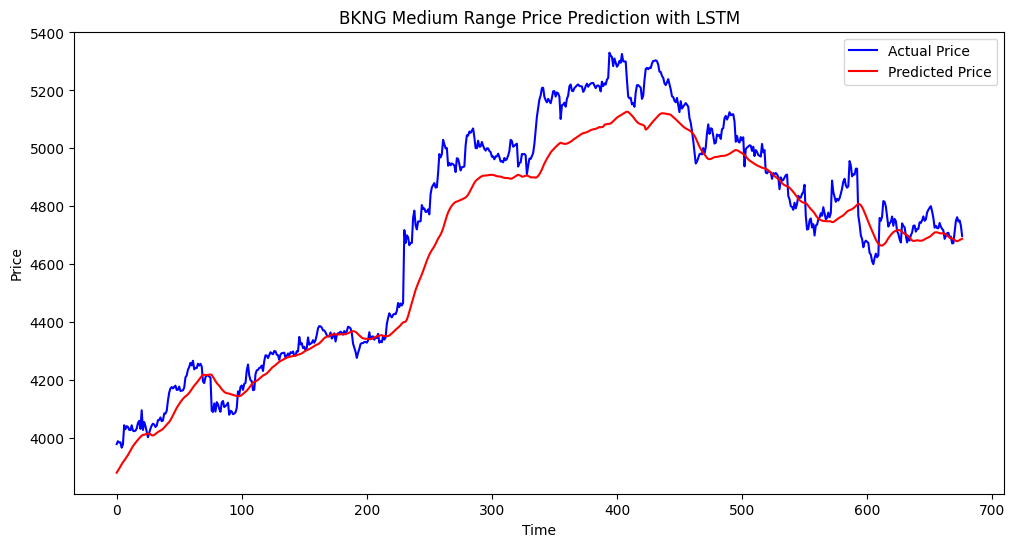

In [97]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_bkng, label='Actual Price', color='blue')
plt.plot(predicted_bkng, label='Predicted Price', color='red')

plt.title('BKNG Medium Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for BKNG

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_bkng, predicted_bkng))
mae = mean_absolute_error(y_test_actual_bkng, predicted_bkng)
mape = np.mean(np.abs((y_test_actual_bkng - predicted_bkng) / y_test_actual_bkng)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 105.6832
MAE: 81.6272
MAPE: 1.68%


## Building LSTM for EXPE

In [99]:
 #Replace infinite values with NaN
EXPE_df_mr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    EXPE_df_mr[column].fillna(EXPE_df_mr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(EXPE_df_mr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_expe = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-99-686c75aafb5b>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [100]:
print(scaled_df_expe.head())
print(scaled_df_expe.shape)
print(scaled_df_expe.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.278813  0.233947  0.249095  0.785647  0.100098
1  0.271959  0.239155  0.248786  0.785793  0.044482
2  0.261486  0.243075  0.248087  0.785957  0.033542
3  0.266120  0.246452  0.247486  0.785980  0.033384
4  0.270367  0.250164  0.247006  0.785862  0.037648
(3445, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [101]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [102]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_expe, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [103]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape

torch.Size([677, 60, 5])
torch.Size([2708, 60, 5])
torch.Size([677])


torch.Size([2708])

In [104]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([677, 1])


torch.Size([2708, 1])

In [105]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [106]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0289
Epoch [20/100], Loss: 0.0231
Epoch [30/100], Loss: 0.0148
Epoch [40/100], Loss: 0.0039
Epoch [50/100], Loss: 0.0029
Epoch [60/100], Loss: 0.0019
Epoch [70/100], Loss: 0.0014
Epoch [80/100], Loss: 0.0014
Epoch [90/100], Loss: 0.0012
Epoch [100/100], Loss: 0.0012


In [107]:
print(y_test.shape)

torch.Size([677, 1])


In [108]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_expe = test_outputs.cpu().numpy()
    y_test_actual_expe = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_expe.shape[0], scaled_df_expe.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_expe[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_expe.shape[0], scaled_df_expe.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_expe[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_expe = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_expe = scaler.inverse_transform(predicted_reshaped)[:,0]

Test Loss: 0.0062


In [109]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_expe_mr.pth')

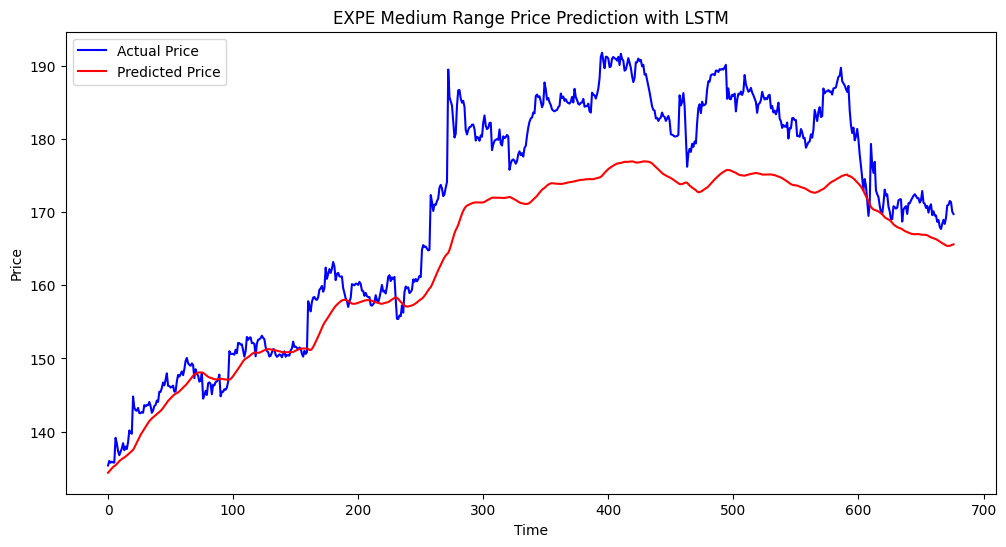

In [110]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_expe, label='Actual Price', color='blue')
plt.plot(predicted_expe, label='Predicted Price', color='red')

plt.title('EXPE Medium Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for EXPE


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_expe, predicted_expe))
mae = mean_absolute_error(y_test_actual_expe, predicted_expe)
mape = np.mean(np.abs((y_test_actual_expe - predicted_expe) / y_test_actual_expe)) * 100    # MAPE in percentage

print(f"RMSE EXPE: {rmse:.4f}")
print(f"MAE EXPE: {mae:.4f}")
print(f"MAPE EXPE: {mape:.2f}%")

RMSE EXPE: 8.1255
MAE EXPE: 6.5835
MAPE EXPE: 3.67%


## Building LSTM for MAR

In [112]:
# Replace infinite values with NaN
MAR_df_mr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    MAR_df_mr[column].fillna(MAR_df_mr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(MAR_df_mr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_mar = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-112-eddbd78ad437>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [113]:
print(scaled_df_expe.head())
print(scaled_df_expe.shape)
print(scaled_df_expe.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.278813  0.233947  0.249095  0.785647  0.100098
1  0.271959  0.239155  0.248786  0.785793  0.044482
2  0.261486  0.243075  0.248087  0.785957  0.033542
3  0.266120  0.246452  0.247486  0.785980  0.033384
4  0.270367  0.250164  0.247006  0.785862  0.037648
(3445, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [114]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [115]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_mar, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [116]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape

torch.Size([677, 60, 5])
torch.Size([2708, 60, 5])
torch.Size([677])


torch.Size([2708])

In [117]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([677, 1])


torch.Size([2708, 1])

In [118]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [119]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0713
Epoch [20/100], Loss: 0.0282
Epoch [30/100], Loss: 0.0221
Epoch [40/100], Loss: 0.0099
Epoch [50/100], Loss: 0.0032
Epoch [60/100], Loss: 0.0022
Epoch [70/100], Loss: 0.0014
Epoch [80/100], Loss: 0.0012
Epoch [90/100], Loss: 0.0010
Epoch [100/100], Loss: 0.0008


In [120]:
print(y_test.shape)

torch.Size([677, 1])


In [121]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_mar = test_outputs.cpu().numpy()
    y_test_actual_mar = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_mar.shape[0], scaled_df_mar.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_mar[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_expe.shape[0], scaled_df_mar.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_mar[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_mar = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_mar = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0009


In [122]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_mar_mr.pth')

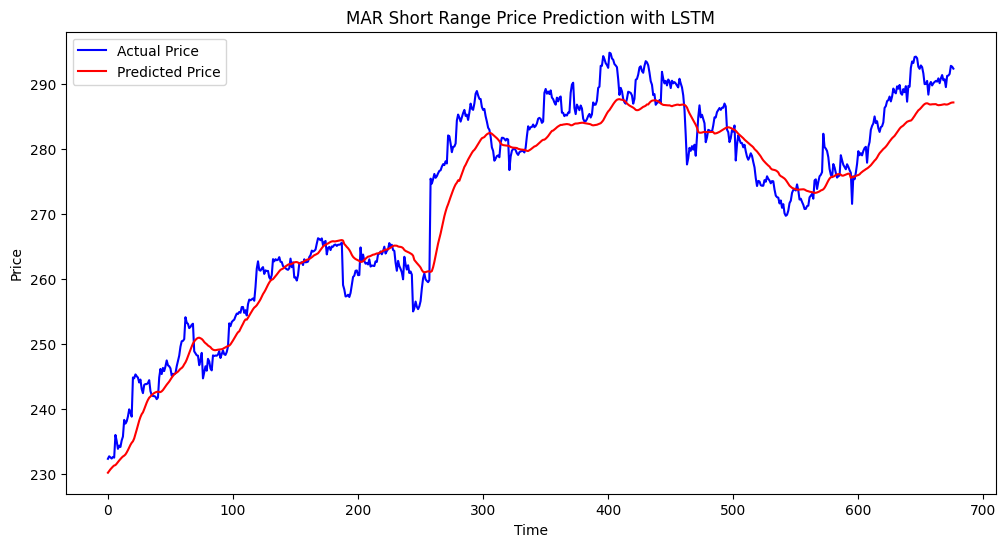

In [123]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_mar, label='Actual Price', color='blue')
plt.plot(predicted_mar, label='Predicted Price', color='red')

plt.title('MAR Short Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for MAR

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_expe, predicted_mar))
mae = mean_absolute_error(y_test_actual_mar, predicted_mar)
mape = np.mean(np.abs((y_test_actual_mar - predicted_mar) / y_test_actual_mar)) * 100    # MAPE in percentage

print(f"RMSE MAR: {rmse:.4f}")
print(f"MAE MAR: {mae:.4f}")
print(f"MAPE MAR: {mape:.2f}%")

RMSE MAR: 100.7880
MAE MAR: 3.2783
MAPE MAR: 1.19%


## Model Tuning:
    Fine-tune model hyperparameters to optimize performance

# Using ARIMA (Autoregressive Integrated Moving Average)

In [125]:
# import stasmodels.tsa.arima.model as ARIMA

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Arima with multiple featurs
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

## Buliding ARIMA for ABNB

In [126]:
df_arima_abnb = ABNB_df_mr.copy()
df_arima_abnb.head()
print(df_arima_abnb.shape)

(3445, 10)


In [127]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_abnb = df_arima_abnb[[target_variable] + features]
df_arima_abnb.head()


Close       MA_10       MA_50         RSI    Volume
49  134.899994  120.342879  116.322052  102.650306  12873960
50  136.649994  122.418869  116.705300  102.613060   4438597
51  135.934998  124.365369  117.045200  106.134349   3139178
52  137.880005  126.331369  117.441200  105.840345   2717532
53  138.091797  128.321548  117.847850  103.210246   2983788

In [128]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_abnb[target_variable])

ADF Statistic: -2.323223
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [129]:
# Differencing if Needed (Make the Data Stationary)
df_arima_abnb_diff = df_arima_abnb.diff().dropna()

check_stationarity(df_arima_abnb[target_variable])

ADF Statistic: -2.323223
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [130]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(f'{label}: {value}')
  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

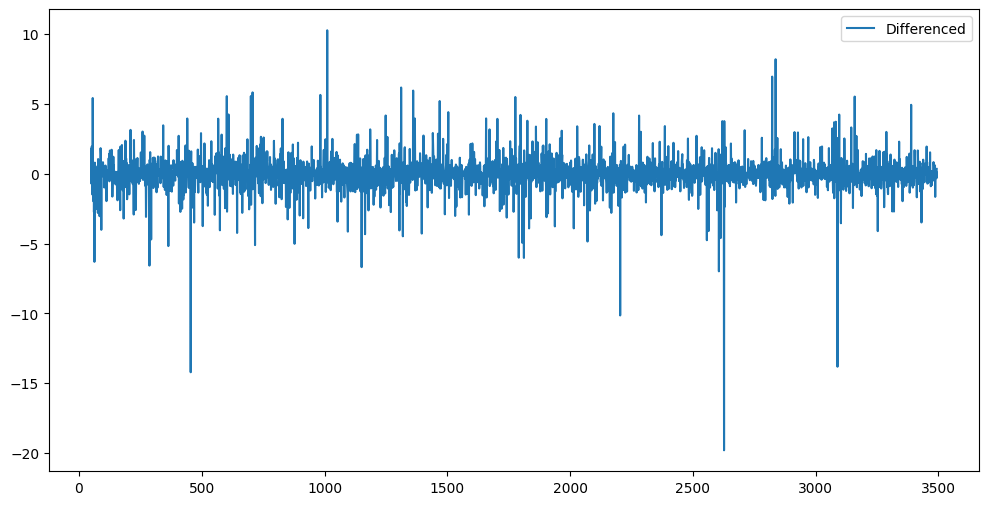

In [131]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_abnb_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [132]:
# split Data into Training & Testing
train_size = int(len(df_arima_abnb)*0.8)
train, test = df_arima_abnb.iloc[:train_size], df_arima_abnb.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [133]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [134]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_abnb_mr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [135]:
# Make predictions
prediction_abnb = model_fit.forecast(steps=len(y_test), exog=X_test)

In [136]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 1.6049
MAE: 1.1547
MAPE: 0.87%


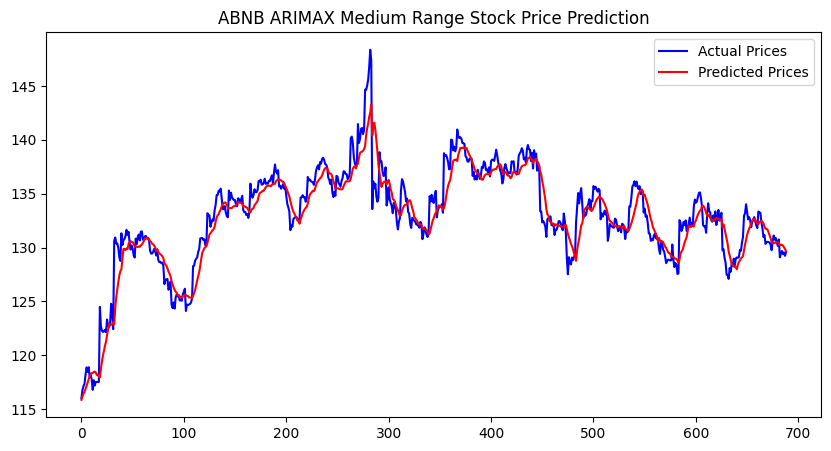

In [137]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_abnb)), prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Medium Range Stock Price Prediction")
plt.show()

In [138]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8922.259, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8915.744, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8916.289, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8916.281, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8913.835, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8918.258, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.252 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2756
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4455.917
Date:                Wed, 05 Feb 2025   AIC                           8913.835
Time:                        23:32:24   BIC                           8919.756
Sample:                             0   HQIC                          8915.974
                               - 2756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.4872      0.009    168.778      0.000       1.470 

In [139]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [140]:
# Make prediction
final_prediction_abnb = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - final_prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 1.6049
MAE: 1.1547
MAPE: 0.87%


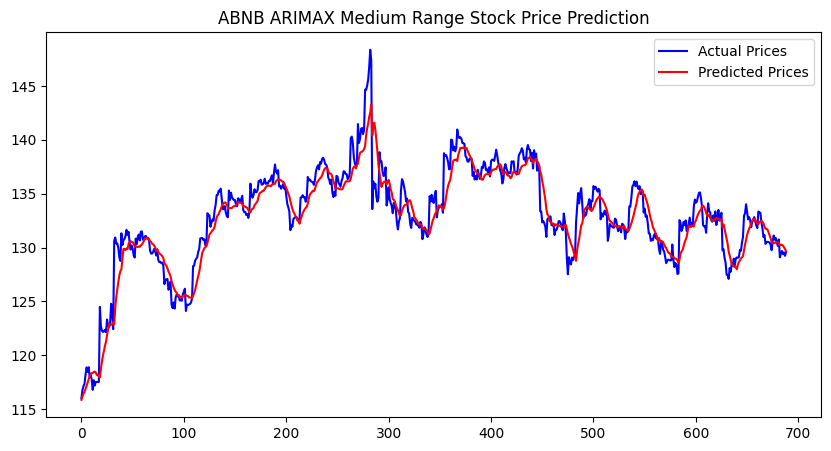

In [141]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_abnb)), final_prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Medium Range Stock Price Prediction")
plt.show()

## Buliding ARIMA for BKNG

In [142]:
df_arima_bkng = BKNG_df_mr.copy()
df_arima_bkng.head()
print(df_arima_bkng.shape)

(3445, 10)


In [143]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_bkng = df_arima_bkng[[target_variable] + features]
df_arima_bkng.head()


Close        MA_10        MA_50         RSI  Volume
49  2498.895020  2456.211499  2435.098721  129.902812   75611
50  2490.120117  2462.897510  2435.872124  150.744972   36428
51  2492.135010  2469.682007  2436.574624  152.870812   26904
52  2501.939941  2474.103003  2437.349224  151.264825   13527
53  2510.610107  2481.445020  2438.247827  141.968634   26620

In [144]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_bkng[target_variable])

ADF Statistic: -0.669909
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [145]:
# Differencing if Needed (Make the Data Stationary)
df_arima_bkng_diff = df_arima_bkng.diff().dropna()

check_stationarity(df_arima_bkng_diff[target_variable])

ADF Statistic: -57.716074
p-value: {result[1]:4f}
The series is stationary


In [146]:
check_stationarity(df_arima_bkng_diff[target_variable])

ADF Statistic: -57.716074
p-value: {result[1]:4f}
The series is stationary


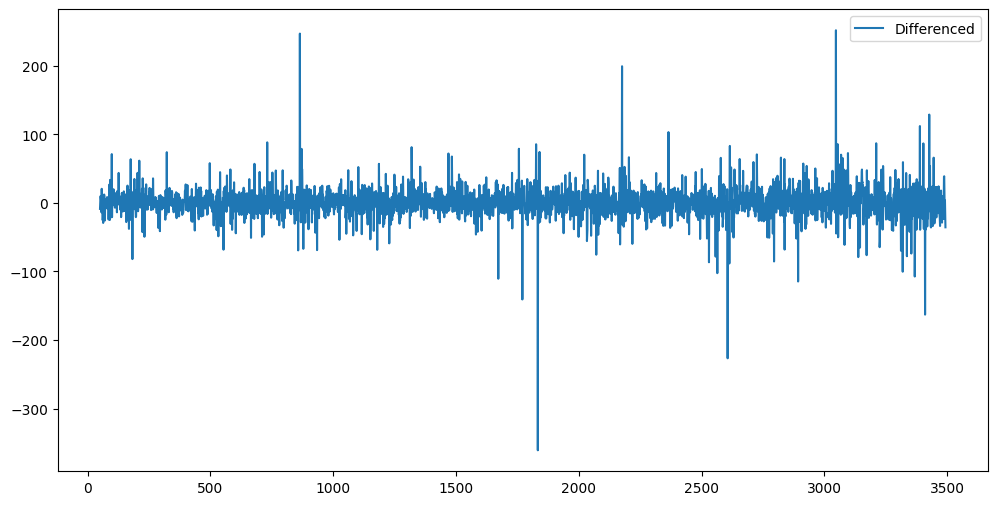

In [147]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_bkng_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [148]:
# split Data into Training & Testing
train_size = int(len(df_arima_bkng)*0.8)
train, test = df_arima_bkng.iloc[:train_size], df_arima_bkng.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [149]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [150]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_bkng_mr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [151]:
# Make predictions
prediction_bkng = model_fit.forecast(steps=len(y_test), exog=X_test)

In [152]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_bkng))
mae = mean_absolute_error(y_test, prediction_bkng)
mape = np.mean(np.abs((y_test - prediction_bkng) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of BKNG: {rmse:.4f}")
print(f"MAE of BKNG: {mae:.4f}")
print(f"MAPE of BKNG: {mape:.2f}%")

RMSE of BKNG: 45.6331
MAE of BKNG: 32.8535
MAPE of BKNG: 0.69%


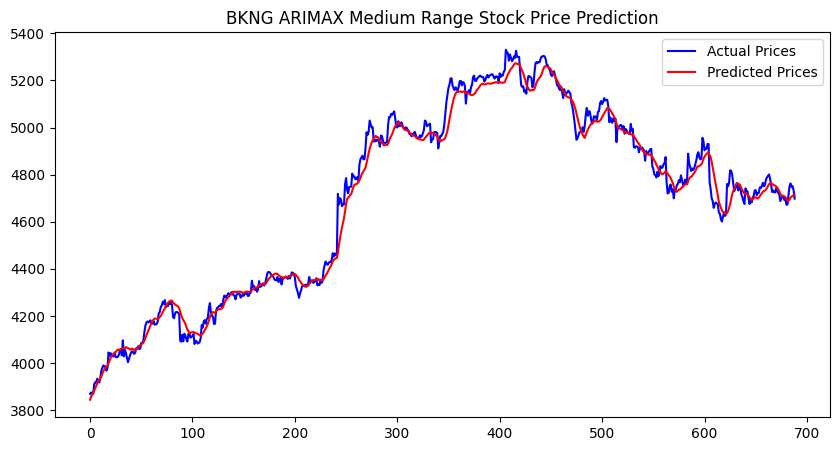

In [153]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_bkng)), prediction_bkng, label="Predicted Prices", color="red")
plt.legend()
plt.title("BKNG ARIMAX Medium Range Stock Price Prediction")
plt.show()

## Buliding ARIMA for EXPE

In [154]:
df_arima_expe = EXPE_df_mr.copy()
df_arima_expe.head()
print(df_arima_expe.shape)

(3445, 10)


In [155]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_expe = df_arima_expe[[target_variable] + features]
df_arima_expe.head()


Close       MA_10       MA_50         RSI  Volume
49  117.114998  113.397500  115.396048  116.779904  787760
50  116.404999  113.925000  115.365648  138.551878  350067
51  115.320000  114.322000  115.296822  162.945911  263969
52  115.800003  114.664001  115.237722  166.383466  262730
53  116.239998  115.040000  115.190422  148.877467  296288

In [156]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_expe[target_variable])

ADF Statistic: -0.939230
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [157]:
# Differencing if Needed (Make the Data Stationary)
df_arima_expe_diff = df_arima_expe.diff().dropna()

check_stationarity(df_arima_expe_diff[target_variable])

ADF Statistic: -42.536800
p-value: {result[1]:4f}
The series is stationary


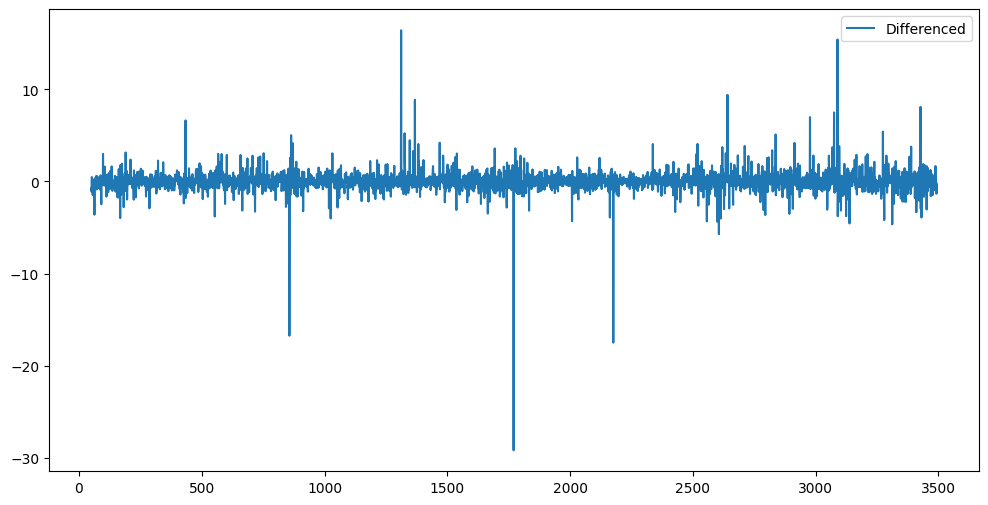

In [158]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_expe_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [159]:
# split Data into Training & Testing
train_size = int(len(df_arima_expe)*0.8)
train, test = df_arima_expe.iloc[:train_size], df_arima_expe.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [160]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [161]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_expe_mr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [162]:
# Make predictions
prediction_expe = model_fit.forecast(steps=len(y_test), exog=X_test)

In [163]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of EXPE: {rmse:.4f}")
print(f"MAE of EXPE: {mae:.4f}")
print(f"MAPE of EXPE: {mape:.2f}%")

RMSE of EXPE: 3.3199
MAE of EXPE: 2.7229
MAPE of EXPE: 1.57%


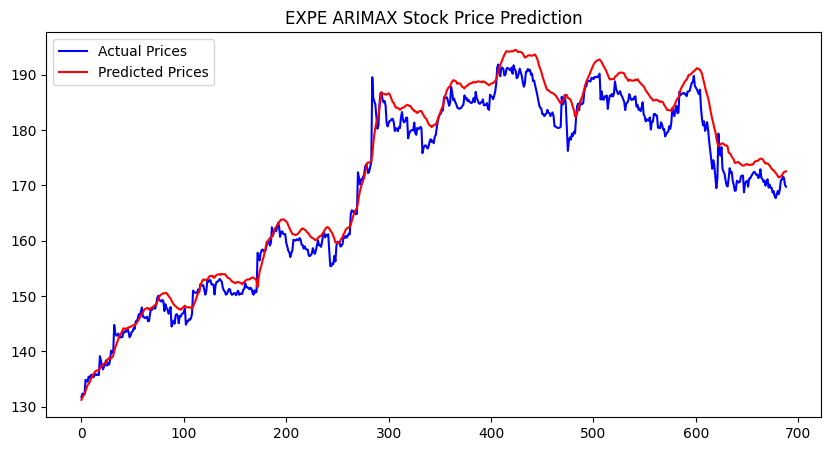

In [164]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_expe)), prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("EXPE ARIMAX Stock Price Prediction")
plt.show()

In [165]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8785.607, Time=4.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8782.534, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8783.989, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8783.982, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8780.583, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8785.959, Time=1.90 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.225 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2756
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4389.291
Date:                Wed, 05 Feb 2025   AIC                           8780.583
Time:                        23:32:47   BIC                           8786.504
Sample:                             0   HQIC                          8782.722
                               - 2756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.4170      0.004    351.463      0.000       1.409 

In [166]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [167]:
# Make prediction
final_prediction_expe = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - final_prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 3.3526
MAE: 2.7229
MAPE: 1.59%


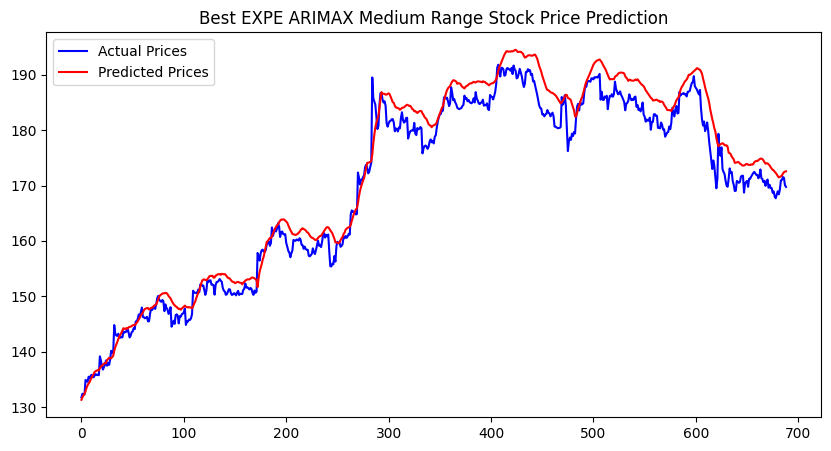

In [168]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_expe)), final_prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best EXPE ARIMAX Medium Range Stock Price Prediction")
plt.show()

## Buliding ARIMA for MAR

In [169]:
df_arima_mar = MAR_df_mr.copy()
df_arima_mar.head()
print(df_arima_mar.shape)

(3445, 10)


In [170]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_mar = df_arima_mar[[target_variable] + features]
df_arima_mar.head()


Close       MA_10       MA_50         RSI  Volume
49  180.449997  178.198599  174.438342  134.687399  500729
50  180.250000  178.772600  174.583542  139.454299  283612
51  179.559998  179.290599  174.707242  163.033124  411484
52  180.035004  179.476100  174.854742  160.601911  187416
53  180.720001  179.850101  175.019742  148.845555  180147

In [171]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_mar[target_variable])

ADF Statistic: -0.332097
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [172]:
# Differencing if Needed (Make the Data Stationary)
df_arima_mar_diff = df_arima_mar.diff().dropna()

check_stationarity(df_arima_mar_diff[target_variable])

ADF Statistic: -58.164049
p-value: {result[1]:4f}
The series is stationary


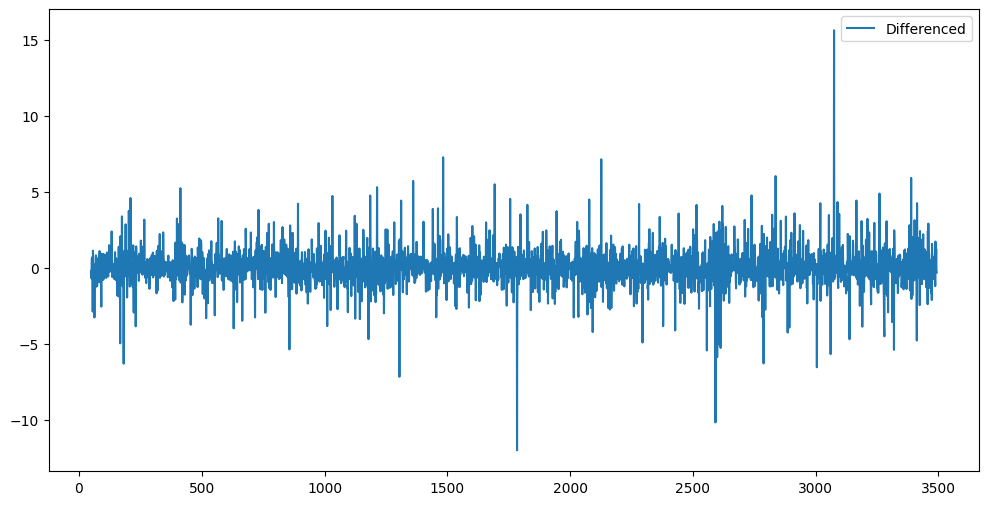

In [173]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_mar_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [174]:
# split Data into Training & Testing
train_size = int(len(df_arima_mar)*0.8)
train, test = df_arima_mar.iloc[:train_size], df_arima_mar.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [175]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [176]:
#import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_mar_mr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [177]:
# Make predictions
prediction_mar = model_fit.forecast(steps=len(y_test), exog=X_test)

In [178]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of MAR: {rmse:.4f}")
print(f"MAE of MAR: {mae:.4f}")
print(f"MAPE of MAR: {mape:.2f}%")

RMSE of MAR: 2.3061
MAE of MAR: 1.6934
MAPE of MAR: 0.62%


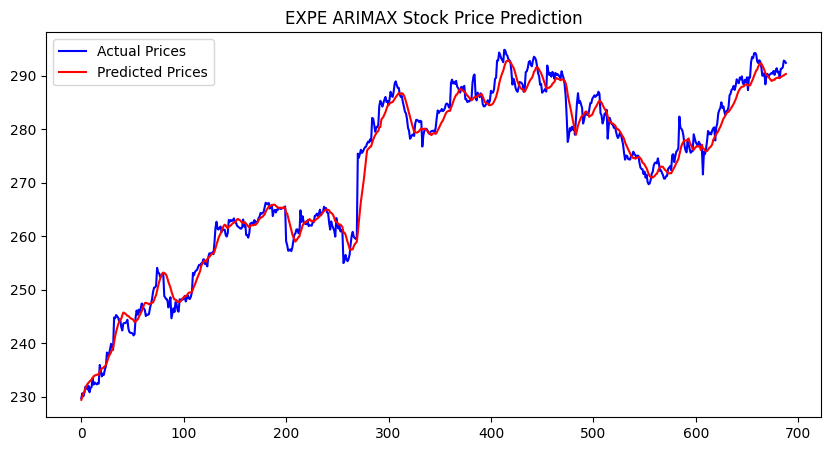

In [179]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_mar)), prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("EXPE ARIMAX Stock Price Prediction")
plt.show()

In [180]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8469.234, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8467.807, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8468.370, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8468.369, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8466.477, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8470.370, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.192 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2756
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4232.239
Date:                Wed, 05 Feb 2025   AIC                           8466.477
Time:                        23:33:00   BIC                           8472.399
Sample:                             0   HQIC                          8468.616
                               - 2756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2643      0.013    100.332      0.000       1.240 

In [181]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [182]:
# Make prediction
final_prediction_mar = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - final_prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 2.3024
MAE: 1.6934
MAPE: 0.62%


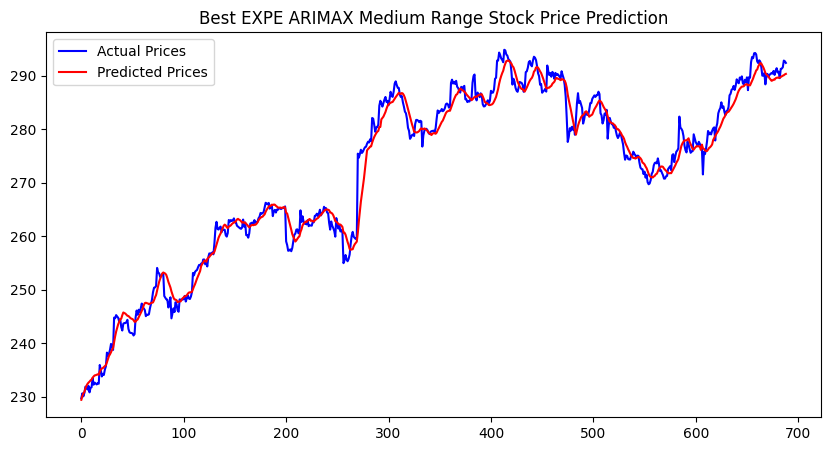

In [183]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_mar)), final_prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best EXPE ARIMAX Medium Range Stock Price Prediction")
plt.show()

## Model Tuning:
    Fine-tune model hyperparameters to optimize performance

# Using Prophet: Facebook's time series forecasting library

**Prophet** is a great alternative to ARIMA for forecasting stock prices when you have multiple features

In [184]:
from prophet import Prophet
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# Load Dataset
df_prophet_abnb = ABNB_df_mr.copy()
print(df_prophet_abnb.head())
print(df_prophet_abnb.shape)

In [ ]:
# Select features
features = ['MA_10', 'MA_50', 'RSI', 'Volume']
target_col = 'Close'

# Rename the target variable to 'y' and date column to 'ds' ((Prophet's required format))
df_prophet_abnb.rename(columns={"Date":"ds", target_col:"y"}, inplace=True)
df_prophet_abnb.head()

# Add additional features
df_prophet_abnb = df_prophet_abnb[['ds','y'] + features]
df_prophet_abnb.head()


In [ ]:
# Before fitting the model, remove the timezone from the 'ds' column:
df_prophet_abnb['ds'] = df_prophet_abnb['ds'].dt.tz_localize(None)

In [ ]:
# Split the data into Training and Testing
train_size = int(len(df_prophet_abnb)*0.8)
train, test = df_prophet_abnb.iloc[:train_size], df_prophet_abnb.iloc[train_size:]

# initialize and tarin the model
model = Prophet()
for feature in features:
  model.add_regressor(feature) # add each feature variable
model.fit(train)  #ValueError: Column ds has timezone specified, which is not supported. Remove timezone.


In [ ]:
# Make Future Prediction
# Set periods to 0 and frequency to match your data
predict_feature = model.make_future_dataframe(periods=len(test), freq='2min')

# Ensure 'ds' columns have the same type and format before filtering
predict_feature['ds'] = pd.to_datetime(predict_feature['ds']).dt.tz_localize(None)
#test['ds'] = pd.to_datetime(test['ds']).dt.tz_localize(None)


predict_feature = predict_feature[predict_feature['ds'].isin(test.index)] # Filter to include only dates present in test data

predict_feature = pd.merge(predict_feature, df_prophet_abnb[['ds'] + features], on='ds', how='left')

# Fill any remaining NaN values with backfill or other methods as appropriate:

predict_feature.fillna(method='ffill', inplace=True)
predict_feature.fillna(method='bfill', inplace=True)

#for feature in features:
 # predict_feature[feature] = df_prophet_abnb[feature]

forecast = model.predict(predict_feature)

# Instead of using test["ds"] directly, get the common dates between forecast and test
#common_dates = forecast['ds'].isin(test['ds'])
#test = test.set_index('ds')

# extract Predictions
prediction_prophet_abnb = forecast.set_index('ds').loc[test.index.to_list(),['yhat']]

In [ ]:
# Evaluate the model performance

rmse = np.sqrt(mean_squared_error(test['y'], prediction_prophet_abnb['yhat']))
mae = mean_absolute_error(test['y'], prediction_prophet_abnb['yhat'])
mape = np.mean(np.abs((test['y'] - prediction_prophet_abnb['yhat']) / test['y'])) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


# Interactive Dashboard Development: